In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

In [2]:
data_path="./data/T20I/"
game_data=pd.read_csv(data_path+"stats/game_table.csv")
match_data=pd.read_csv(data_path+"stats/game_stats.csv")
game_data.columns

c:\users\evolj\documents\github\cric_bet\venv\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['Unnamed: 0', 'match_id', 'season', 'start_date', 'venue', 'innings',
       'ball', 'batting_team', 'bowling_team', 'striker', 'non_striker',
       'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes',
       'legbyes', 'penalty', 'wicket_type', 'player_dismissed',
       'other_wicket_type', 'other_player_dismissed', 'rain', 'balls_remain',
       'wickets_remain', 'rr', 'sr', 'sr_two', 'rrr', 'current_score',
       'e_r_career', 'Av_career', 's_r_career', 'extras_striker',
       'extras_bowler', 'games_striker', 'games_bowler', 'wicket_scored',
       'overs', 'new_no_ball', 'w_b', 'striker_performance'],
      dtype='object')

In [3]:
striker_positions=game_data.groupby(["match_id","batting_team"]).striker.unique()
bowler_positions=game_data.groupby(["match_id","batting_team"]).bowler.unique()
striker_position_sheet=pd.read_csv(data_path+"/stats/runs_player_stats.csv")
striker_position_sheet=pd.DataFrame(columns=striker_position_sheet.columns).drop(columns=["date"])
bowler_position_sheet=striker_position_sheet.copy()
striker_max_position_sheet=striker_position_sheet.copy()
bowler_max_position_sheet=bowler_position_sheet.copy()
inning_striker_sheet=striker_position_sheet.copy()
inning_bowler_sheet=striker_position_sheet.copy()
striker_position_sheet

,A Ahmadhel,A Ashokan,A Bagai,A Balbirnie,A Bhagwat,A Bhattarai,A Bohara,A Bulow,A Dananjaya,A Dutt,...,Zeeshan Maqsood,Zeeshan Siddiqui,Ziaur Rahman,Ziaur Rahman (2),Zishan Shah,Zohaib Sarwar,Zubaidi Zulkifle,Zulfiqar Babar,Zulqarnain Haider,Zulqarnain Haider (2)


In [4]:
h=0
for i,j in zip(striker_positions.index,striker_positions):
    i=i[0]
    l=len(j)
    for p in j:
        pos=np.where(j==p)[0][0]
        striker_position_sheet.loc[i,p]=pos
        striker_max_position_sheet.loc[i,p]=l
        inning_striker_sheet.loc[i,p]=h+1
    h=(h+1)%2
h=0
for i,j in zip(bowler_positions.index,bowler_positions):
    i=i[0]
    l=len(j)
    for p in j:
        pos=np.where(j==p)[0][0]
        bowler_position_sheet.loc[i,p]=pos
        bowler_max_position_sheet.loc[i,p]=l
        inning_bowler_sheet.loc[i,p]=h+1
    h=(h+1)%2
print(striker_position_sheet)
striker_position_sheet.to_csv(data_path+"/stats/striker_position_player_stats.csv")
striker_max_position_sheet.to_csv(data_path+"/stats/striker_max_position_player_stats.csv")
inning_striker_sheet.to_csv(data_path+"/stats/striker_inning_player_stats.csv")
print(bowler_position_sheet)
bowler_position_sheet.to_csv(data_path+"/stats/bowler_position_player_stats.csv")
bowler_max_position_sheet.to_csv(data_path+"/stats/bowler_max_position_player_stats.csv")
inning_bowler_sheet.to_csv(data_path+"/stats/bowler_inning_player_stats.csv")

        A Ahmadhel A Ashokan A Bagai A Balbirnie A Bhagwat A Bhattarai  \
211028         NaN       NaN     NaN         NaN       NaN         NaN   
211048         NaN       NaN     NaN         NaN       NaN         NaN   
222678         NaN       NaN     NaN         NaN       NaN         NaN   
225263         NaN       NaN     NaN         NaN       NaN         NaN   
225271         NaN       NaN     NaN         NaN       NaN         NaN   
...            ...       ...     ...         ...       ...         ...   
1263708        NaN         2     NaN         NaN       NaN         NaN   
1263710        NaN         1     NaN         NaN       NaN         NaN   
1263711        NaN         4     NaN         NaN       NaN         NaN   
1263712        NaN       NaN     NaN         NaN       NaN         NaN   
1263713        NaN         2     NaN         NaN       NaN         NaN   

        A Bohara A Bulow A Dananjaya A Dutt  ... Zeeshan Maqsood  \
211028       NaN     NaN         NaN    NaN

In [5]:
runs_sheet=pd.read_csv(data_path+"/stats/runs_player_stats.csv")
balls_sheet=pd.read_csv(data_path+"/stats/balls_player_stats.csv")
dismissed_sheet=pd.read_csv(data_path+"/stats/dismissed_player_stats.csv")
concived_runs_sheet=pd.read_csv(data_path+"/stats/concived_runs_player_stats.csv")
balls_bowler_sheet=pd.read_csv(data_path+"/stats/balls_bowl_player_stats.csv")
extras_striker_sheet=pd.read_csv(data_path+"/stats/extras_striker_player_stats.csv")
extras_bowler_sheet=pd.read_csv(data_path+"/stats/extras_bowler_player_stats.csv")
positions_striker_sheet=pd.read_csv(data_path+"/stats/striker_position_player_stats.csv")
positions_bowler_sheet=pd.read_csv(data_path+"/stats/bowler_position_player_stats.csv")
striker_position_sheet=pd.read_csv(data_path+"/stats/striker_position_player_stats.csv")
striker_max_position_sheet=pd.read_csv(data_path+"/stats/striker_max_position_player_stats.csv")
inning_striker_sheet=pd.read_csv(data_path+"/stats/striker_inning_player_stats.csv")
bowler_position_sheet=pd.read_csv(data_path+"/stats/bowler_position_player_stats.csv")
bowler_max_position_sheet=pd.read_csv(data_path+"/stats/bowler_max_position_player_stats.csv")
inning_bowler_sheet=pd.read_csv(data_path+"/stats/bowler_inning_player_stats.csv")

<ipython-input-6-f1800c547813>:6: RuntimeWarning: invalid value encountered in double_scalars
  strike_rate=runs_sheet[player].iloc[:i].sum()/balls_sheet[player].iloc[:i].sum()*100


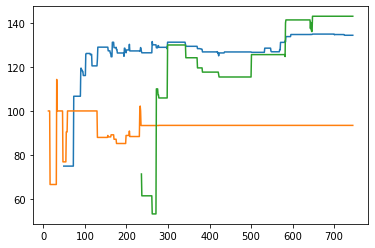

In [6]:
def career_strike_rate(player):
    strike_rates=[]
    for i in range(1,len(runs_sheet)):
        #if np.isnan(runs_sheet[player].iloc[i]):
        #   continue
        strike_rate=runs_sheet[player].iloc[:i].sum()/balls_sheet[player].iloc[:i].sum()*100
        strike_rates.append(strike_rate)
    plt.plot(strike_rates)
career_strike_rate("EJG Morgan")
career_strike_rate("SCJ Broad")
career_strike_rate("MM Ali")
plt.show()

In [7]:
striker_rate_sheet=runs_sheet.copy().drop(columns=["date"])
endurance_sheet=runs_sheet.copy().drop(columns=["date"])
games_played_sheet=balls_sheet.copy().drop(columns=["date"])>1
rs=runs_sheet.drop(columns=["date"])
bs=balls_sheet.drop(columns=["date"])
ds=dismissed_sheet.drop(columns=["date"])
for i in range(1,len(rs)):
    striker_rate_sheet.iloc[i]=(rs.iloc[:i].sum().values.astype(np.float)/bs.iloc[:i].sum().values.astype(np.float))*100
    endurance_sheet.iloc[i]=bs.iloc[:i].sum().values.astype(np.float)/ds.iloc[:i].sum().values.astype(np.float)
endurance_sheet.replace([np.inf, -np.inf], np.nan, inplace=True)
print(striker_rate_sheet)
print(endurance_sheet)
striker_rate_sheet.to_csv(data_path+"/stats/striker_rate_player_stats.csv")
endurance_sheet.to_csv(data_path+"/stats/striker_endurance_stats.csv")
#games_played_sheet.to_csv(data_path+"/stats/striker_games_played_stats.csv")

<ipython-input-7-941183b0afd3>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  striker_rate_sheet.iloc[i]=(rs.iloc[:i].sum().values.astype(np.float)/bs.iloc[:i].sum().values.astype(np.float))*100
<ipython-input-7-941183b0afd3>:8: RuntimeWarning: invalid value encountered in true_divide
  striker_rate_sheet.iloc[i]=(rs.iloc[:i].sum().values.astype(np.float)/bs.iloc[:i].sum().values.astype(np.float))*100
<ipython-input-7-941183b0afd3>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, 

     A Ahmadhel  A Ashokan    A Bagai  A Balbirnie  A Bhagwat  A Bhattarai  \
0           NaN        NaN        NaN          NaN        NaN          NaN   
1           NaN        NaN        NaN          NaN        NaN          NaN   
2           NaN        NaN        NaN          NaN        NaN          NaN   
3           NaN        NaN        NaN          NaN        NaN          NaN   
4           NaN        NaN        NaN          NaN        NaN          NaN   
..          ...        ...        ...          ...        ...          ...   
742        25.0        NaN  97.029703   127.272727  16.666667    66.666667   
743        25.0        NaN  97.029703   127.272727  16.666667    66.666667   
744        25.0        NaN  97.029703   127.272727  16.666667    66.666667   
745        25.0  94.117647  97.029703   127.272727  16.666667    66.666667   
746        25.0  90.476190  97.029703   127.272727  16.666667    66.666667   

     A Bohara    A Bulow  A Dananjaya  A Dutt  ...  Zeeshan Maq

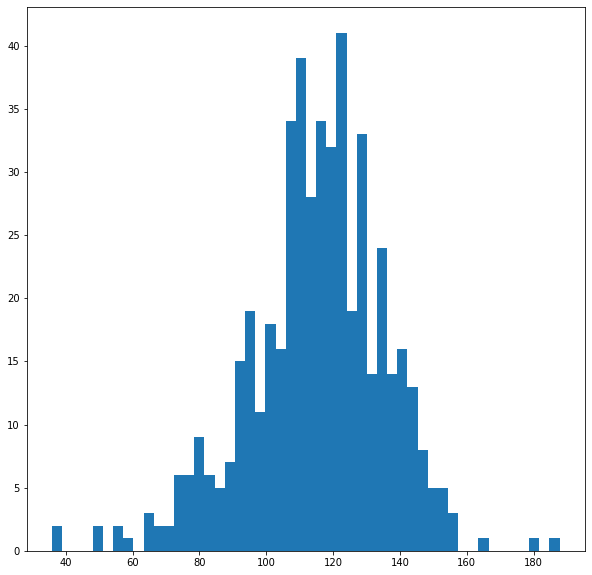

In [8]:
fig,ax=plt.subplots(figsize=(10,10))
indices=(games_played_sheet.sum()>5).values
plt.hist(striker_rate_sheet.iloc[-1][indices],bins=50)
plt.show()

In [44]:
print(len(match_data.groupby(['team_1'])))

55


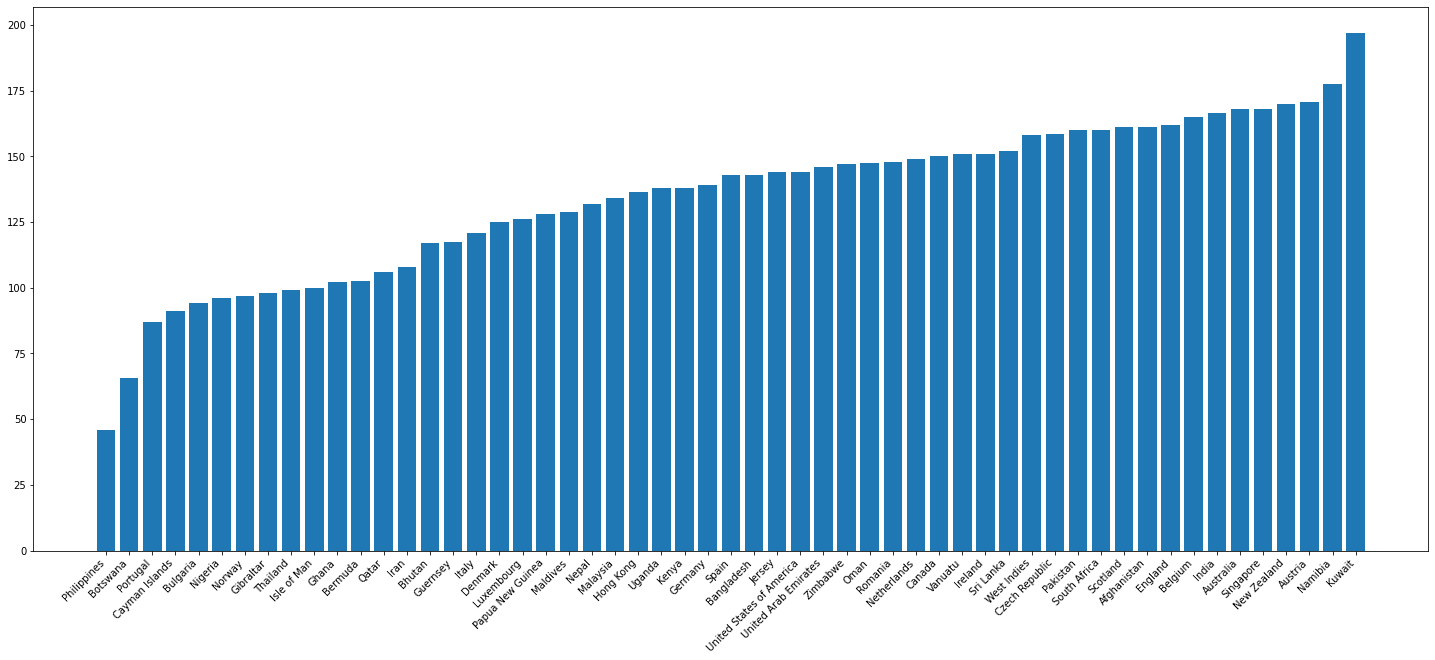

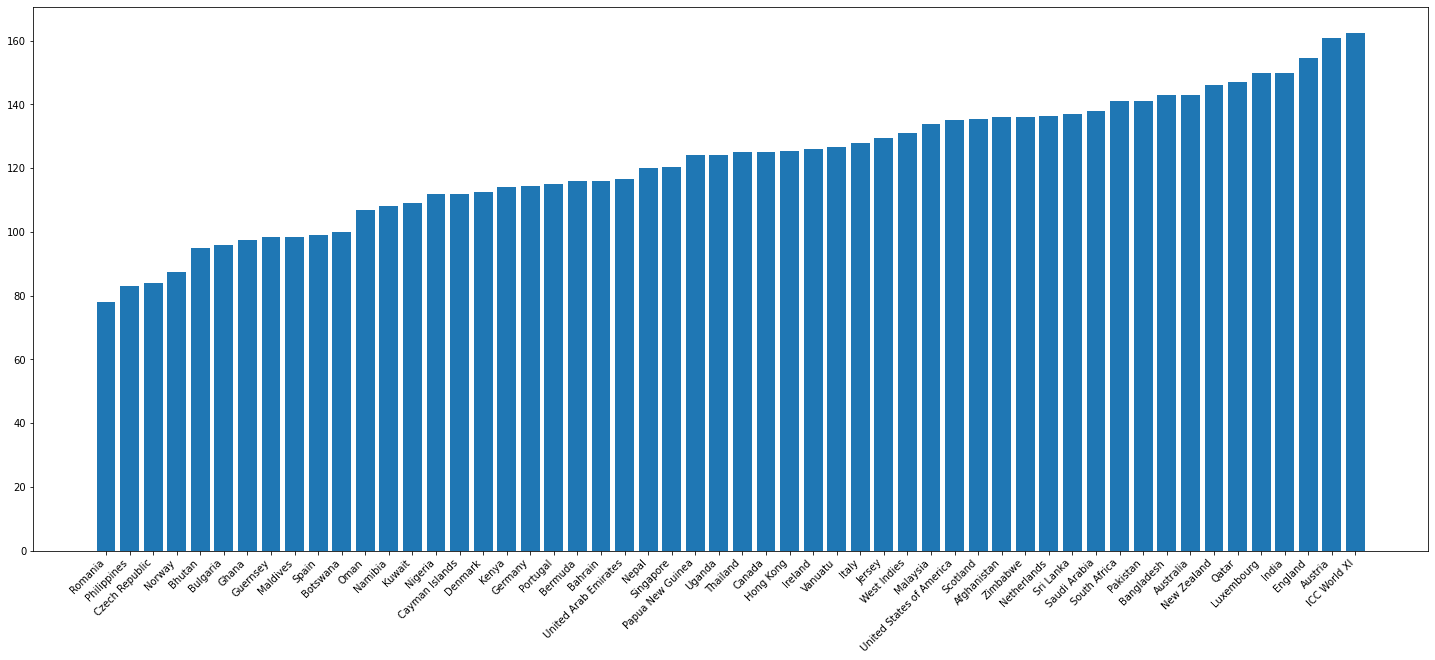

In [9]:
t20i_path="data/T20I/"
match_data=pd.read_csv(t20i_path+"stats/game_stats.csv")
score_1=match_data.groupby(['team_1'])["score_1"].median().sort_values()
score_2=match_data.groupby(['team_2'])["score_2"].median().sort_values()
fig,ax=plt.subplots(figsize=(25,10))
plt.bar(score_1.index,score_1)
plt.xticks(rotation=45, ha='right')
plt.show()

fig,ax=plt.subplots(figsize=(25,10))
plt.bar(score_2.index,score_2)
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
team_stats=pd.DataFrame(columns=["score_med1","score_std1","wickets_med1","wickets_std1","balls_med1","balls_std1","difference_med","difference_std"])
for c in team_stats.columns:
    mode=c.split("_")[-1]
    co=c.split("_")[0]+"_1"
    if co=="balls_1":
        co="balls_played_1"
    if co=='difference_1':
        co='difference'
    if mode=="med":
        team_stats[c]=match_data.groupby(['team_1'])[co].median()
    else:
        team_stats[c]=match_data.groupby(['team_1'])[co].std()
print(team_stats)

                          score_med1  score_std1  wickets_med1  wickets_std1  \
team_1                                                                         
Afghanistan                36.273331   36.273331      1.603972      1.603972   
Australia                  34.663561   34.663561      2.139948      2.139948   
Austria                    12.020815   12.020815      0.707107      0.707107   
Bangladesh                 33.484616   33.484616      2.510223      2.510223   
Belgium                    12.288206   12.288206      1.154701      1.154701   
Bermuda                    27.705595   27.705595      1.329160      1.329160   
Bhutan                           NaN         NaN           NaN           NaN   
Botswana                   27.577164   27.577164      1.414214      1.414214   
Bulgaria                   48.083261   48.083261      3.535534      3.535534   
Canada                     25.343200   25.343200      1.494434      1.494434   
Cayman Islands             24.020824   2

In [23]:
from sklearn.decomposition import PCA
team_stats=team_stats.dropna()
pca = PCA(n_components=2)
reduced_data=pca.fit_transform(team_stats)
print(reduced_data)
sns.scatterplot(reduced_data[:,0],reduced_data[:,1])
plt.show()

[[ 1.00443860e+01  6.98746748e+00]
 [ 1.46259512e+01 -3.53307937e+00]
 [ 7.17397411e+00  4.59450219e+01]
 [ 6.98498598e+00 -1.40494299e+01]
 [-1.06039713e+01  4.33376597e+01]
 [-8.56798242e+00 -1.05017324e+01]
 [-1.35976340e+01 -2.76296703e+01]
 [ 2.20532443e+01 -1.46526718e+01]
 [-2.70630719e+00  2.96088484e+00]
 [-2.26205890e+01 -9.50091094e+00]
 [-4.39931114e+01 -4.22620637e+00]
 [ 1.51464164e+01  2.67861961e+01]
 [ 1.69493529e+01 -7.48465505e+00]
 [ 5.88846169e-03 -1.37467417e+00]
 [-3.35965773e+01 -5.20453825e+00]
 [-3.94374513e+01 -1.14824028e+00]
 [-4.46609676e+01  8.57674932e+00]
 [-5.96070482e+00 -3.35876198e+00]
 [ 8.55809031e+00 -4.36505386e+00]
 [ 1.00721512e+01 -6.06908310e+00]
 [ 7.87150742e-01  2.32194286e+01]
 [ 3.53277361e+00 -9.50241071e+00]
 [ 2.03312286e+01  6.83547893e+00]
 [ 8.77182898e+00 -2.80800355e+00]
 [-1.98251437e+01 -1.57181339e+01]
 [ 1.06338197e+01  5.28674172e+01]
 [ 4.62796471e+01 -2.28709254e+01]
 [ 1.44231679e+01 -1.09612513e+01]
 [ 1.25656420e+01 -3

c:\users\evolj\documents\github\cric_bet\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [24]:
team_won=match_data.groupby("team_1").apply(lambda x: (x.difference>0).sum())#/len(x.difference)
team_won

team_1
Afghanistan                 33
Australia                   31
Austria                      1
Bangladesh                  16
Belgium                      3
Bermuda                      2
Bhutan                       0
Botswana                     0
Bulgaria                     1
Canada                       5
Cayman Islands               1
Czech Republic               0
Denmark                      3
England                     36
Germany                      1
Ghana                        0
Gibraltar                    0
Guernsey                     1
Hong Kong                    7
India                       41
Iran                         0
Ireland                     20
Isle of Man                  0
Italy                        1
Jersey                       6
Kenya                        7
Kuwait                       2
Luxembourg                   0
Malaysia                     8
Maldives                     0
Namibia                     10
Nepal                        8
N

<IPython.core.display.Javascript object>


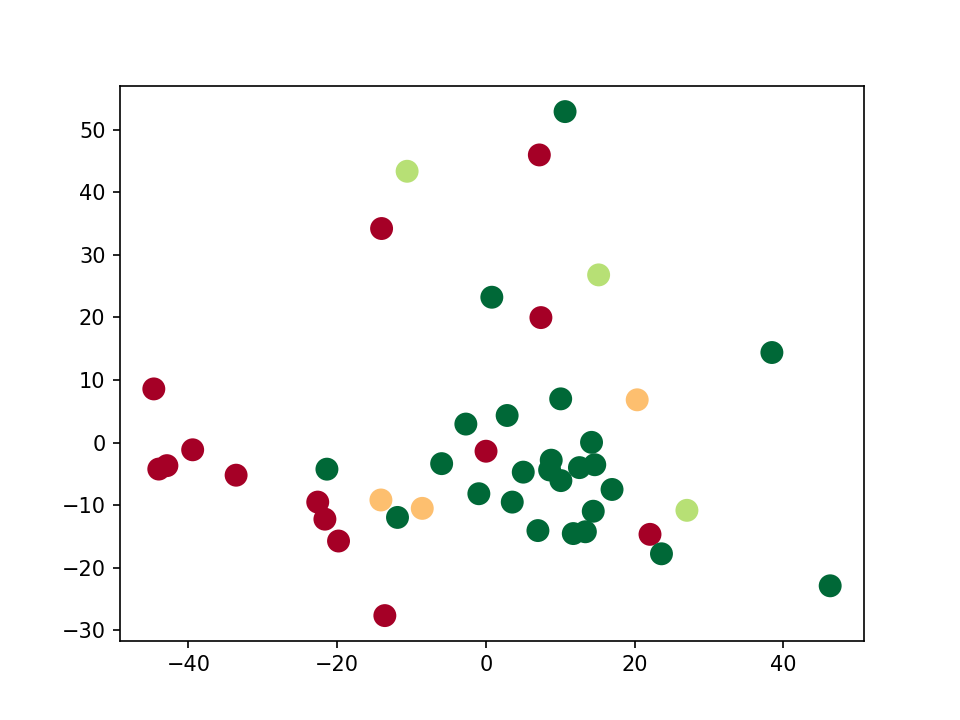

In [27]:
%matplotlib notebook

x =reduced_data[:,0]
y = reduced_data[:,1]
names = team_stats.index
c = team_won[names].values

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

<IPython.core.display.Javascript object>


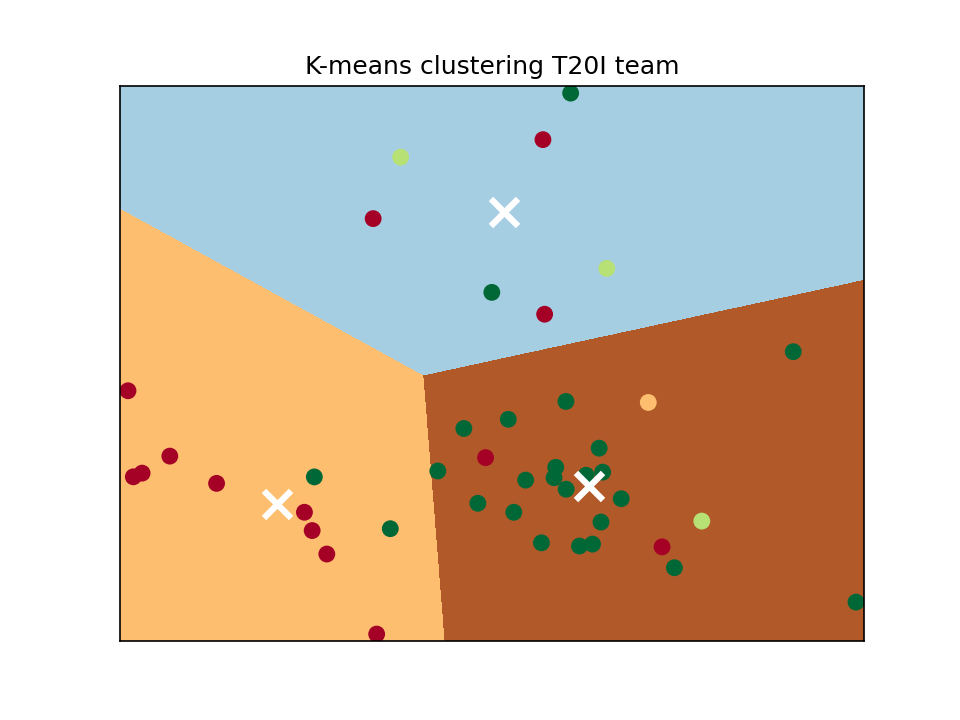

[1 1 1 ... 0 0 0]


In [29]:
from sklearn.cluster import KMeans
%matplotlib notebook

fig,ax = plt.subplots()
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],c=c, s=50, cmap=cmap, norm=norm)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering T20I team")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [35]:
runs_sheet=pd.read_csv(t20i_path+"/stats/runs_player_stats.csv")
balls_sheet=pd.read_csv(t20i_path+"/stats/balls_player_stats.csv")
dismissed_sheet=pd.read_csv(t20i_path+"/stats/dismissed_player_stats.csv")
concived_runs_sheet=pd.read_csv(t20i_path+"/stats/concived_runs_player_stats.csv")
balls_bowler_sheet=pd.read_csv(t20i_path+"/stats/balls_bowl_player_stats.csv")
extras_striker_sheet=pd.read_csv(t20i_path+"/stats/extras_striker_player_stats.csv")
extras_bowler_sheet=pd.read_csv(t20i_path+"/stats/extras_bowler_player_stats.csv")
positions_striker_sheet=pd.read_csv(t20i_path+"/stats/striker_position_player_stats.csv")
positions_bowler_sheet=pd.read_csv(t20i_path+"/stats/bowler_position_player_stats.csv")
def get_stats(strikers, bowlers,team="",min_dismissed=3):
    columns=["player","team","games_played","runs","balls_striker","dismissed","extras_striker","strike_rate","wb","striker_average","concived_runs","balls_bowler","extras_bowler","economy","positions_striker","positions_bowler"]
    stats=pd.DataFrame(columns=columns)
    stats["player"]=list(set(list(strikers)+list(bowlers)))
    stats["team"]=[team for i in range(len(stats))]
    pos_count=np.zeros(11)
    pos_name=np.zeros(11).astype(str)
    for s in strikers:
        runs=runs_sheet[s].sum()
        stats["runs"][stats["player"]==s]=runs
        balls=balls_sheet[s].sum()
        stats["balls_striker"][stats["player"]==s]=balls
        stats["games_played"][stats["player"]==s]=balls_sheet[s].count()
        dismissed=dismissed_sheet[s].sum()
        stats["dismissed"][stats["player"]==s]=dismissed
        extras=extras_striker_sheet[s].sum()/balls
        stats["extras_striker"][stats["player"]==s]=extras
        sr=runs/balls*100
        stats["strike_rate"][stats["player"]==s]=sr
        wb=balls/dismissed
        stats["wb"][stats["player"]==s]=wb
        avg=runs/dismissed
        stats["striker_average"][stats["player"]==s]=avg
        stats["positions_striker"][stats["player"]==s]=positions_striker_sheet[s]
        
        pos_list=positions_striker_sheet[s].value_counts()
        for i,j in zip(pos_list.index,pos_list):
            if i>10:
                continue
            if pos_list.loc[i]>pos_count[int(i)]:
                if dismissed>min_dismissed:
                    pos_count[int(i)]=pos_list.loc[i]
                    pos_name[int(i)]=s
                    break
        #print(pos_name)
        #print(pos_count)
        #print(s)
        #print(dismissed)
        #print(sr)
        #print(stats)
    for b in bowlers:
        #print(positions_bowler_sheet[b].value_counts())
        concived=concived_runs_sheet[b].sum()
        stats["concived_runs"][stats["player"]==b]=concived
        balls_bowler=balls_bowler_sheet[b].sum()
        stats["balls_bowler"][stats["player"]==b]=balls_bowler
        extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
        stats["extras_bowler"][stats["player"]==b]=extras_bowler
        er=concived/(balls_bowler/6)
        stats["economy"][stats["player"]==b]=er
        stats["positions_bowler"][stats["player"]==s]=positions_bowler_sheet[s]
        #print(b)
        #print(er)
    stats.replace([np.inf, -np.inf], np.nan, inplace=True)
    pos_name[pos_name=="0.0"]=pos_name[0]
    return stats,pos_name

In [36]:
game_data=pd.read_csv(t20i_path+"/stats/game_table.csv")
def get_team_stats(team="England",min_dismissed=3,min_balls_bowled=50):
    strikers=np.unique(game_data[game_data["batting_team"]==team].striker)
    bowlers=np.unique(game_data[game_data["bowling_team"]==team].bowler)
    team_stats,pos_name = get_stats(strikers, bowlers,team=team, min_dismissed=min_dismissed)

    team_stats_strikers=team_stats[team_stats["dismissed"]>min_dismissed]
    team_stats_strikers=team_stats_strikers.fillna(team_stats_strikers.median())
    team_stats_strikers=team_stats_strikers.sort_values(by=['games_played','strike_rate','wb'],ascending=False).reset_index().set_index('player').drop(columns=['index']).loc[pos_name]#[:11]
    #print(team_stats_strikers)

    team_stats_bowlers=team_stats[team_stats["balls_bowler"]>min_balls_bowled]
    team_stats_bowlers=team_stats_bowlers.fillna(team_stats_bowlers.median())
    team_stats_bowlers=team_stats_bowlers.sort_values(by=['games_played','economy']).reset_index()[:11]
    #print(team_stats_bowlers)
    return team_stats_strikers,team_stats_bowlers, team_stats

c:\users\evolj\documents\github\cric_bet\venv\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [37]:
england_strikers,england_bowlers,england_stats=get_team_stats("England",5,10)
netherlands_strikers,netherlands_bowlers, netherlands_stats=get_team_stats("Netherlands",5,10)
ireland_strikers,ireland_bowlers, ireland_stats=get_team_stats("Ireland",2,10)
afghanistan_strikers,afghanistan_bowlers, afghanistan_stats=get_team_stats("Afghanistan",5,10)
botswana_strikers,botswana_bowlers, botswana_stats=get_team_stats("Botswana",2,10)

<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bo

<IPython.core.display.Javascript object>


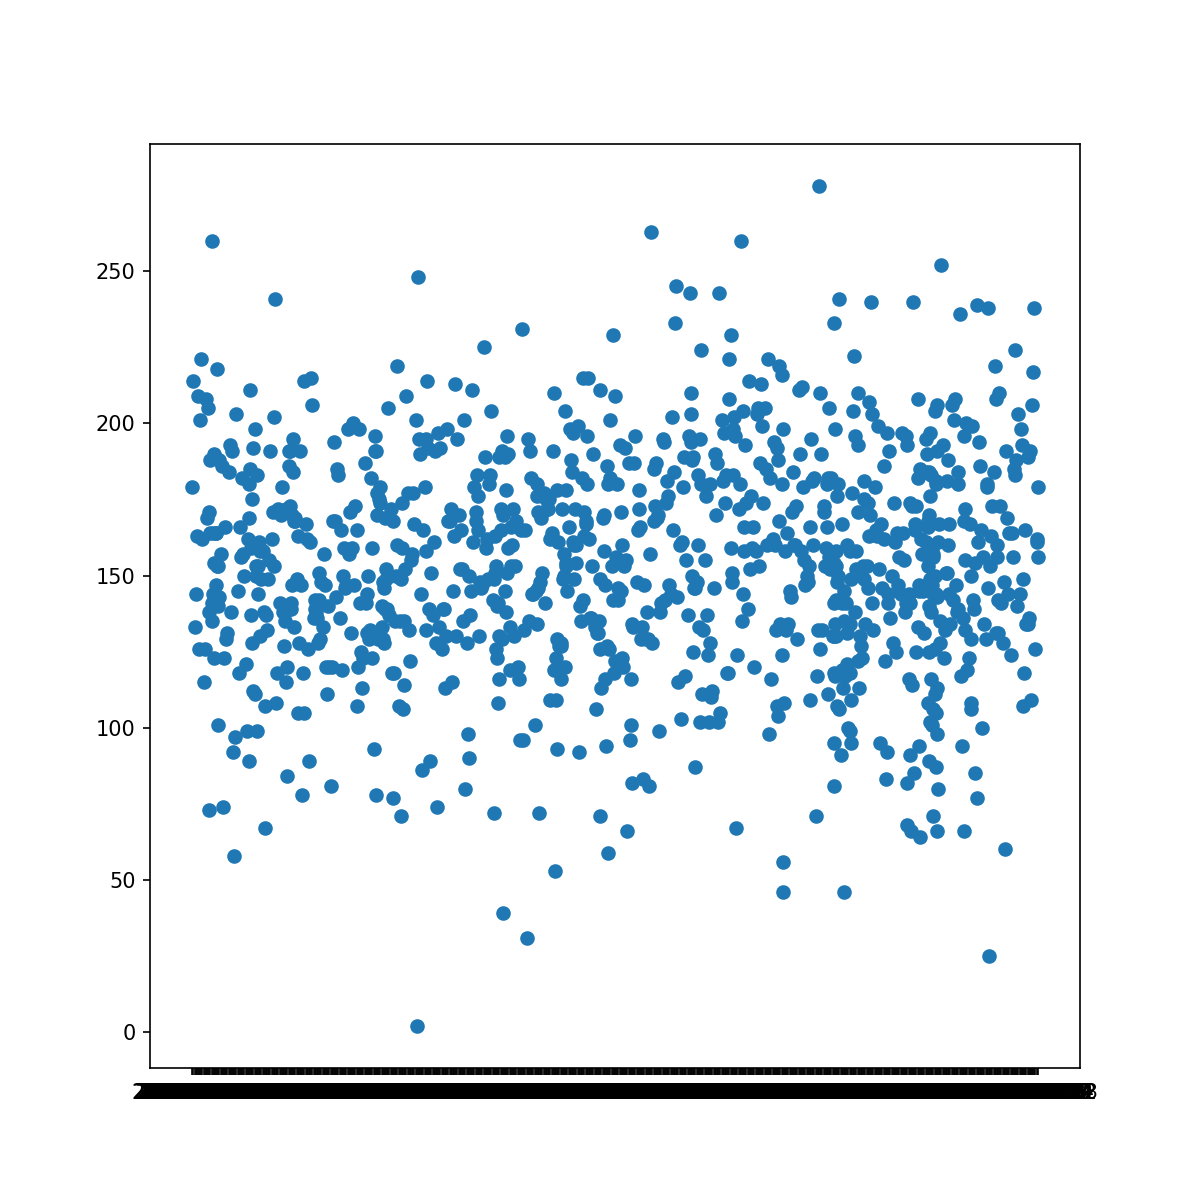

In [38]:
fig,ax=plt.subplots(figsize=(8,8))
plt.scatter(match_data.start_date,match_data.score_1)
plt.show()

In [40]:
for i in ["wb","strike_rate","economy","runs"]:
            team_stats[i+"_mean"]=[0 for t in team_stats.index]
            team_stats[i+"_std"]=[0 for t in team_stats.index]
            team_stats[i+"_mean_all"]=[0 for t in team_stats.index]
            team_stats[i+"_std_all"]=[0 for t in team_stats.index]
all_strikers=[]
for t in team_stats.index:
    print(t)
    try:
        strikers,bowlers,stats=get_team_stats(t,min_dismissed=1)
        all_strikers.append(strikers)
        for i in ["wb","strike_rate","economy","runs"]:
            if i!="econ":
                team_stats[i+"_mean"].loc[t]=np.mean(sorted(strikers[i])[::-1][:5])
                team_stats[i+"_std"].loc[t]=np.std(sorted(strikers[i])[::-1][:5])
            else:
                team_stats[i+"_mean"].loc[t]=np.mean(sorted(strikers[i])[:5])
                team_stats[i+"_std"].loc[t]=np.std(sorted(strikers[i])[:5])
            team_stats[i+"_mean_all"].loc[t]=np.mean(sorted(strikers[i]))
            team_stats[i+"_std_all"].loc[t]=np.std(sorted(strikers[i]))
        #print(strikers)
    except:
        for i in ["wb","strike_rate","economy","runs"]:
            team_stats[i+"_mean"].loc[t]=0
            team_stats[i+"_std"].loc[t]=0
            team_stats[i+"_mean_all"].loc[t]=0
            team_stats[i+"_std_all"].loc[t]=0
#all_strikers=pd.DataFrame(all_strikers)
team_stats

Afghanistan


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bowler/6)
c:\users\evolj\documents\github\cric_bet\venv\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, val

Australia


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bowler/6)
<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/di

Austria


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bowler/6)


Bangladesh


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed


Belgium
Bermuda


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: R

Botswana
Bulgaria


<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:25: R

Canada


<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bowler/6)
<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed


Cayman Islands


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bowler/6)
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/

Czech Republic


<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bowler/6)
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed


Denmark
England


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bo

Germany


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bo

Ghana


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bo

Gibraltar


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bo

Guernsey
Hong Kong

<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bo


India


<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed


Ireland


<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed


Jersey


<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bo

Kenya


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bowler/6)


Kuwait


<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bo

Malaysia


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed


Maldives


<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bo

Namibia


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bowler/6)


Nepal


<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bo

Netherlands


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed


New Zealand


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed


Nigeria


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bo

Norway


<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bowler/6)


Oman


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed


Pakistan


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bo

Papua New Guinea


<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed


Scotland


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bo

Singapore


<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bowler/6)
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed


South Africa


<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed


Sri Lanka


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed


Thailand


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed


Uganda
United Arab Emirates


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bo

United States of America


<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bowler/6)
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed


Vanuatu
West Indies


<ipython-input-35-438eaf429b17>:25: RuntimeWarning: invalid value encountered in double_scalars
  extras=extras_striker_sheet[s].sum()/balls
<ipython-input-35-438eaf429b17>:27: RuntimeWarning: invalid value encountered in double_scalars
  sr=runs/balls*100
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: invalid value encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: invalid value encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bo

Zimbabwe


<ipython-input-35-438eaf429b17>:29: RuntimeWarning: divide by zero encountered in double_scalars
  wb=balls/dismissed
<ipython-input-35-438eaf429b17>:31: RuntimeWarning: divide by zero encountered in double_scalars
  avg=runs/dismissed
<ipython-input-35-438eaf429b17>:56: RuntimeWarning: invalid value encountered in double_scalars
  extras_bowler=extras_bowler_sheet[b].sum()/balls_bowler
<ipython-input-35-438eaf429b17>:58: RuntimeWarning: invalid value encountered in double_scalars
  er=concived/(balls_bowler/6)


,score_med1,score_std1,wickets_med1,wickets_std1,balls_med1,balls_std1,difference_med,difference_std,wb_mean,wb_std,...,strike_rate_mean_all,strike_rate_std_all,economy_mean,economy_std,economy_mean_all,economy_std_all,runs_mean,runs_std,runs_mean_all,runs_std_all
team_1,,,,,,,,,,,,,,,,,,,,,
Afghanistan,36.273331,36.273331,1.603972,1.603972,3.612828,3.612828,21.0,29.068745,23.650278,3.568362,...,125.818679,29.371599,7.223387,0.210321,6.849491,5.420544e-01,1189.0,254.271508,678.727273,524.962006
Australia,34.663561,34.663561,2.139948,2.139948,7.443953,7.443953,1.5,42.409811,21.206732,1.507645,...,127.372676,21.241692,7.818227,0.602466,7.147229,8.067355e-01,1188.8,222.855469,611.000000,556.929080
Austria,12.020815,12.020815,0.707107,0.707107,2.828427,2.828427,38.5,55.861436,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000
Bangladesh,33.484616,33.484616,2.510223,2.510223,18.485129,18.485129,-1.0,29.390807,19.898500,1.984166,...,99.657456,25.731017,9.419890,1.917075,8.151996,1.777337e+00,1102.6,256.260492,554.090909,533.426395
Belgium,12.288206,12.288206,1.154701,1.154701,2.309401,2.309401,49.0,26.102363,20.300000,5.988322,...,111.686289,53.435842,9.144000,0.928000,8.680000,9.892513e-01,57.0,29.926577,29.181818,32.434040
Bermuda,27.705595,27.705595,1.329160,1.329160,9.791152,9.791152,-1.0,17.862437,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000
Botswana,27.577164,27.577164,1.414214,1.414214,33.941125,33.941125,-2.5,2.121320,23.458333,6.375626,...,74.799262,15.715065,10.686053,1.189118,8.792717,2.135439e+00,95.0,17.435596,57.090909,38.761402
Bulgaria,48.083261,48.083261,3.535534,3.535534,22.627417,22.627417,16.0,24.041631,11.966667,8.529947,...,62.594310,14.025624,5.628988,0.253688,5.441832,3.309217e-01,22.8,17.267310,14.454545,13.937286
Canada,25.343200,25.343200,1.494434,1.494434,2.699794,2.699794,4.5,31.137687,18.283333,3.649049,...,112.999210,28.086289,7.298026,0.428214,6.518708,9.252734e-01,110.6,50.337263,73.454545,48.700128


[[ 9.43712389e+02 -7.27068228e+01]
 [ 9.20123281e+02 -6.90601661e+01]
 [-5.49425191e+02  4.26408394e+01]
 [ 8.24064731e+02 -4.23994666e+00]
 [-4.64640931e+02  2.50500728e+00]
 [-5.49660519e+02  4.34327075e+01]
 [-4.26205786e+02  1.00936987e-01]
 [-5.11827802e+02  2.42399521e+01]
 [-3.92923960e+02  3.47304279e+00]
 [-4.91620322e+02  2.66132523e+01]
 [-3.31531624e+02 -8.10711816e+01]
 [-4.48753653e+02 -2.48148172e+01]
 [ 1.01792259e+03 -4.86936789e+00]
 [-4.06229287e+02 -5.48458509e+01]
 [-5.49758004e+02  4.37607395e+01]
 [-5.49763990e+02  4.37808830e+01]
 [-5.49736108e+02  4.36870618e+01]
 [-1.13565522e+02  1.80991104e+01]
 [ 1.74553566e+03  1.49149489e+02]
 [ 3.70852600e+02  1.79184041e+02]
 [-4.55955594e+02 -4.88473461e+00]
 [-2.19517808e+02  3.36474419e+01]
 [-4.94363422e+02  1.50485970e+01]
 [ 2.10944680e+01  6.86752174e+01]
 [-4.41522516e+02  6.83263646e+00]
 [-2.58708017e+02 -9.64006160e+01]
 [-6.02164568e+01  3.37291729e+01]
 [ 6.10565835e+01 -1.56187379e+00]
 [ 1.24475584e+03  1

<IPython.core.display.Javascript object>


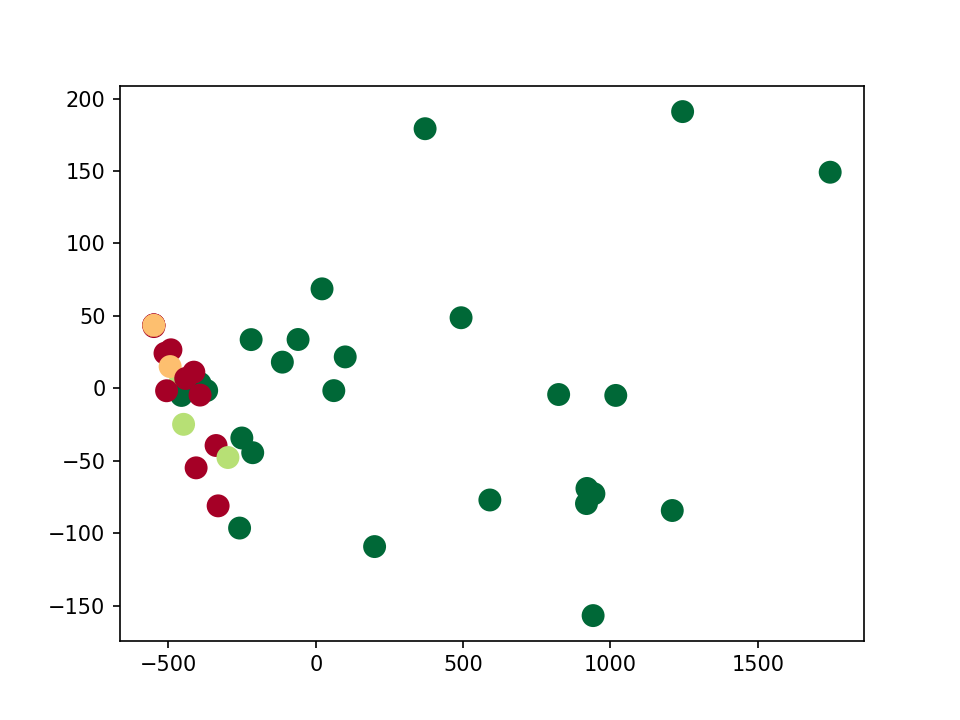

In [50]:
from sklearn.decomposition import PCA
team_stats=team_stats.dropna()
pca = PCA(n_components=2)
reduced_data=pca.fit_transform(team_stats[team_stats.columns[7:]])
print(reduced_data)

%matplotlib notebook

x =reduced_data[:,0]
y = reduced_data[:,1]
names = team_stats.index
c = team_won[names].values

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

<IPython.core.display.Javascript object>


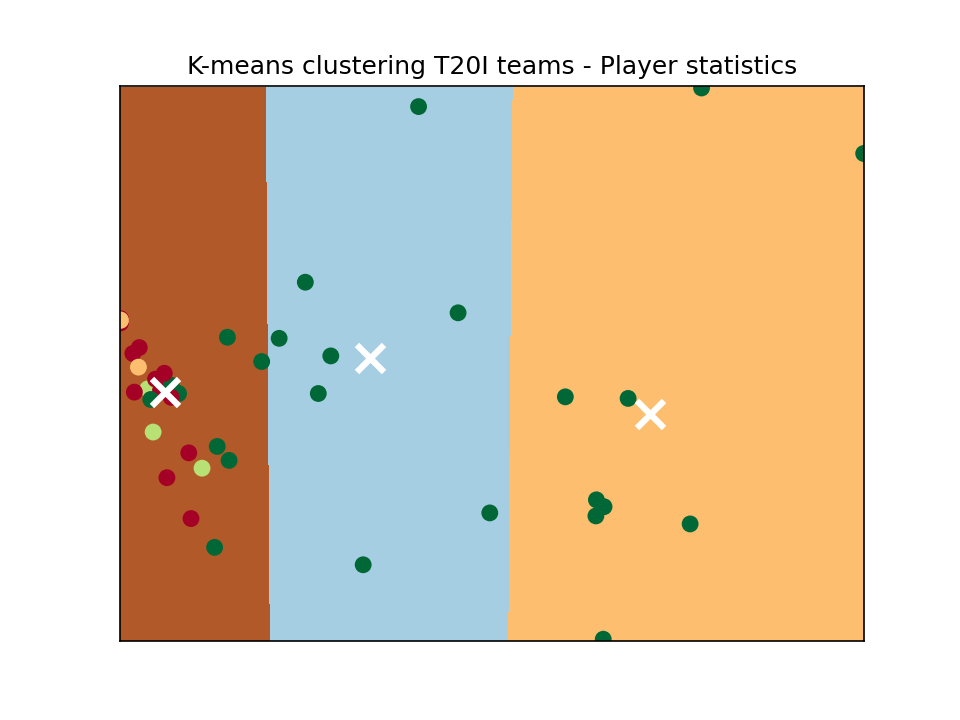

In [42]:
from sklearn.cluster import KMeans
%matplotlib notebook

fig,ax = plt.subplots()
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 1     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],c=c, s=50, cmap=cmap, norm=norm)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering T20I teams - Player statistics")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [455]:
team_stats["cluster"]=kmeans.predict(reduced_data)
team_stats[team_stats.cluster==0]

,score_med1,score_std1,wickets_med1,wickets_std1,balls_med1,balls_std1,difference_med,difference_std,wb_mean,wb_std,...,strike_rate_std_all,economy_mean,economy_std,economy_mean_all,economy_std_all,runs_mean,runs_std,runs_mean_all,runs_std_all,cluster
team_1,,,,,,,,,,,,,,,,,,,,,
Afghanistan,36.273331,36.273331,1.603972,1.603972,3.612828,3.612828,21.0,29.068745,23.650278,3.568362,...,29.371599,7.223387,0.210321,6.849491,0.542054,1189.0,254.271508,678.727273,524.962006,0
Australia,34.663561,34.663561,2.139948,2.139948,7.443953,7.443953,1.5,42.409811,21.206732,1.507645,...,21.241692,7.818227,0.602466,7.147229,0.806736,1188.8,222.855469,611.000000,556.929080,0
Bangladesh,33.484616,33.484616,2.510223,2.510223,18.485129,18.485129,-1.0,29.390807,19.898500,1.984166,...,25.731017,9.419890,1.917075,8.151996,1.777337,1102.6,256.260492,554.090909,533.426395,0
England,35.175655,35.175655,1.750010,1.750010,17.280408,17.280408,3.0,41.108181,22.534868,1.850049,...,16.281960,8.554380,1.033860,8.019001,0.861239,1242.2,324.985784,669.909091,579.472559,0
India,34.190502,34.190502,2.059939,2.059939,8.832016,8.832016,5.5,32.396963,28.789948,4.618441,...,27.515424,7.968078,0.924079,7.273639,0.989402,1791.0,607.833201,935.545455,897.695369,0
New Zealand,36.349282,36.349282,1.932463,1.932463,12.589142,12.589142,10.0,32.555289,23.204362,3.232059,...,21.244368,8.677806,1.252719,7.837721,1.210836,1373.2,562.580270,730.636364,703.968785,0
Pakistan,29.389407,29.389407,2.058268,2.058268,4.456606,4.456606,11.0,30.975137,23.114839,2.275381,...,15.431503,7.613186,1.229812,6.927716,1.046548,1412.2,277.498396,776.000000,640.356293,0
Sri Lanka,32.040376,32.040376,2.175191,2.175191,3.156409,3.156409,-1.0,34.184458,22.077259,3.435848,...,31.831397,7.449435,0.664771,6.992928,0.640063,1167.8,231.087343,676.454545,522.409690,0
West Indies,38.495170,38.495170,2.183520,2.183520,15.615688,15.615688,1.0,29.597140,22.942786,1.779945,...,23.233483,7.627788,0.159212,7.007207,0.731335,1187.6,181.288279,742.909091,492.186671,0


In [369]:
print(match_data.start_date)

0       2005-06-13
1       2005-02-17
2       2005-10-21
3       2006-08-28
4       2006-06-15
           ...    
1005    2021-05-21
1006    2021-05-22
1007    2021-05-22
1008    2021-05-23
1009    2021-05-23
Name: start_date, Length: 1010, dtype: object


In [370]:
relative_player_stats=pd.DataFrame(columns=["win_rate","games_played","run_difference"],index=balls_sheet.columns[1:])
player_matches=game_data.groupby("striker")["match_id"].apply(lambda x: list(np.unique(x)))
for p in balls_sheet.columns[1:]:
    try:
        relative_player_stats["win_rate"][p]=(match_data[match_data.match_id.isin(player_matches[p])].difference>0).sum()/len(match_data[match_data.match_id.isin(player_matches[p])])
        relative_player_stats["games_played"][p]=len(match_data[match_data.match_id.isin(player_matches[p])])
        relative_player_stats["run_difference"][p]=np.mean(match_data[match_data.match_id.isin(player_matches[p])].difference)
    except:
        relative_player_stats["win_rate"][p]=0
        relative_player_stats["games_played"][p]=0
        relative_player_stats["run_difference"][p]=-1
relative_player_stats

,win_rate,games_played,run_difference
A Ahmadhel,0.0,1,-1.0
A Ashokan,0.4,5,31.0
A Bagai,0.5,4,4.0
A Balbirnie,0.578947,38,22.815789
A Bhagwat,0.666667,3,14.666667
...,...,...,...
Zohaib Sarwar,0.333333,3,8.0
Zubaidi Zulkifle,0.75,4,23.25
Zulfiqar Babar,0.666667,3,29.666667
Zulqarnain Haider,0.0,2,-3.0


In [372]:
relative_player_stats_cluster=pd.DataFrame(columns=["win_rate","games_played","run_difference"],index=balls_sheet.columns[1:])
player_matches=game_data.groupby("striker")["match_id"].apply(lambda x: list(np.unique(x)))
for p in balls_sheet.columns[1:]:
    temp=[]
    try:
        pm=player_matches[p]
    except:
        pm=[]
    for m in pm:
        try:
            if match_data[match_data.match_id==m].team_1.values[0]==team:
                c=team_stats.cluster[match_data[match_data.match_id==m].team_2.values[0]]
            else:
                c=team_stats.cluster[match_data[match_data.match_id==m].team_1.values[0]]
        except:
            c=0
        if c==1:
            temp.append(m)
    try:
        relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
        relative_player_stats_cluster["games_played"][p]=len(match_data[match_data.match_id.isin(temp)])
        relative_player_stats_cluster["run_difference"][p]=np.mean(match_data[match_data.match_id.isin(temp)].difference)
    except:
        relative_player_stats_cluster["win_rate"][p]=0
        relative_player_stats_cluster["games_played"][p]=0
        relative_player_stats_cluster["run_difference"][p]=-1
relative_player_stats_cluster

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-372-00369e958fff>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[m

,win_rate,games_played,run_difference
A Ahmadhel,0.0,1,-1.0
A Ashokan,0.5,4,39.0
A Bagai,0.333333,3,4.666667
A Balbirnie,0.666667,6,10.333333
A Bhagwat,0.5,2,3.5
...,...,...,...
Zohaib Sarwar,0.0,1,-3.0
Zubaidi Zulkifle,1.0,2,34.0
Zulfiqar Babar,NaN,0,NaN
Zulqarnain Haider,NaN,0,NaN


In [373]:
relative_player_stats_cluster2=pd.DataFrame(columns=["win_rate","games_played","run_difference"],index=balls_sheet.columns[1:])
player_matches=game_data.groupby("striker")["match_id"].apply(lambda x: list(np.unique(x)))
for p in balls_sheet.columns[1:]:
    temp=[]
    try:
        pm=player_matches[p]
    except:
        pm=""
    for m in pm:
        try:
            if match_data[match_data.match_id==m].team_1.values[0]==team:
                c=team_stats.cluster[match_data[match_data.match_id==m].team_2.values[0]]
            else:
                c=team_stats.cluster[match_data[match_data.match_id==m].team_1.values[0]]
        except:
            c=0
        if c==2:
            temp.append(m)
    try:
        relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
        relative_player_stats_cluster2["games_played"][p]=len(match_data[match_data.match_id.isin(temp)])
        relative_player_stats_cluster2["run_difference"][p]=np.mean(match_data[match_data.match_id.isin(temp)].difference)

    except:
        relative_player_stats_cluster2["win_rate"][p]=0
        relative_player_stats_cluster2["games_played"][p]=0
        relative_player_stats_cluster2["run_difference"][p]=-1
relative_player_stats_cluster2

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-373-c39badb1b361>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster2["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

,win_rate,games_played,run_difference
A Ahmadhel,NaN,0,NaN
A Ashokan,NaN,0,NaN
A Bagai,1.0,1,2.0
A Balbirnie,0.44,25,14.08
A Bhagwat,1.0,1,37.0
...,...,...,...
Zohaib Sarwar,NaN,0,NaN
Zubaidi Zulkifle,0.5,2,12.5
Zulfiqar Babar,NaN,0,NaN
Zulqarnain Haider,NaN,0,NaN


In [374]:
relative_player_stats_cluster0=pd.DataFrame(columns=["win_rate","games_played","run_difference"],index=balls_sheet.columns[1:])
player_matches=game_data.groupby("striker")["match_id"].apply(lambda x: list(np.unique(x)))
for p in balls_sheet.columns[1:]:
    temp=[]
    try:
        pm=player_matches[p]
    except:
        pm=""
    for m in pm:
        try:
            if match_data[match_data.match_id==m].team_1.values[0]==team:
                c=team_stats.cluster[match_data[match_data.match_id==m].team_2.values[0]]
            else:
                c=team_stats.cluster[match_data[match_data.match_id==m].team_1.values[0]]
        except:
            c=0
        if c==0:
            temp.append(m)
    try:
        relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
        relative_player_stats_cluster0["games_played"][p]=len(match_data[match_data.match_id.isin(temp)])
        relative_player_stats_cluster0["run_difference"][p]=np.mean(match_data[match_data.match_id.isin(temp)].difference)
    except:
        relative_player_stats_cluster0["win_rate"][p]=0
        relative_player_stats_cluster0["games_played"][p]=0
        relative_player_stats_cluster0["run_difference"][p]=-1
relative_player_stats_cluster0

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_data[match_data.match_id.isin(temp)])
<ipython-input-374-baff064ab5d2>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_player_stats_cluster0["win_rate"][p]=(match_data[match_data.match_id.isin(temp)].difference>0).sum()/len(match_da

,win_rate,games_played,run_difference
A Ahmadhel,NaN,0,NaN
A Ashokan,0.0,1,-1.0
A Bagai,NaN,0,NaN
A Balbirnie,1.0,7,64.714286
A Bhagwat,NaN,0,NaN
...,...,...,...
Zohaib Sarwar,0.5,2,13.5
Zubaidi Zulkifle,NaN,0,NaN
Zulfiqar Babar,0.666667,3,29.666667
Zulqarnain Haider,0.0,2,-3.0


<IPython.core.display.Javascript object>


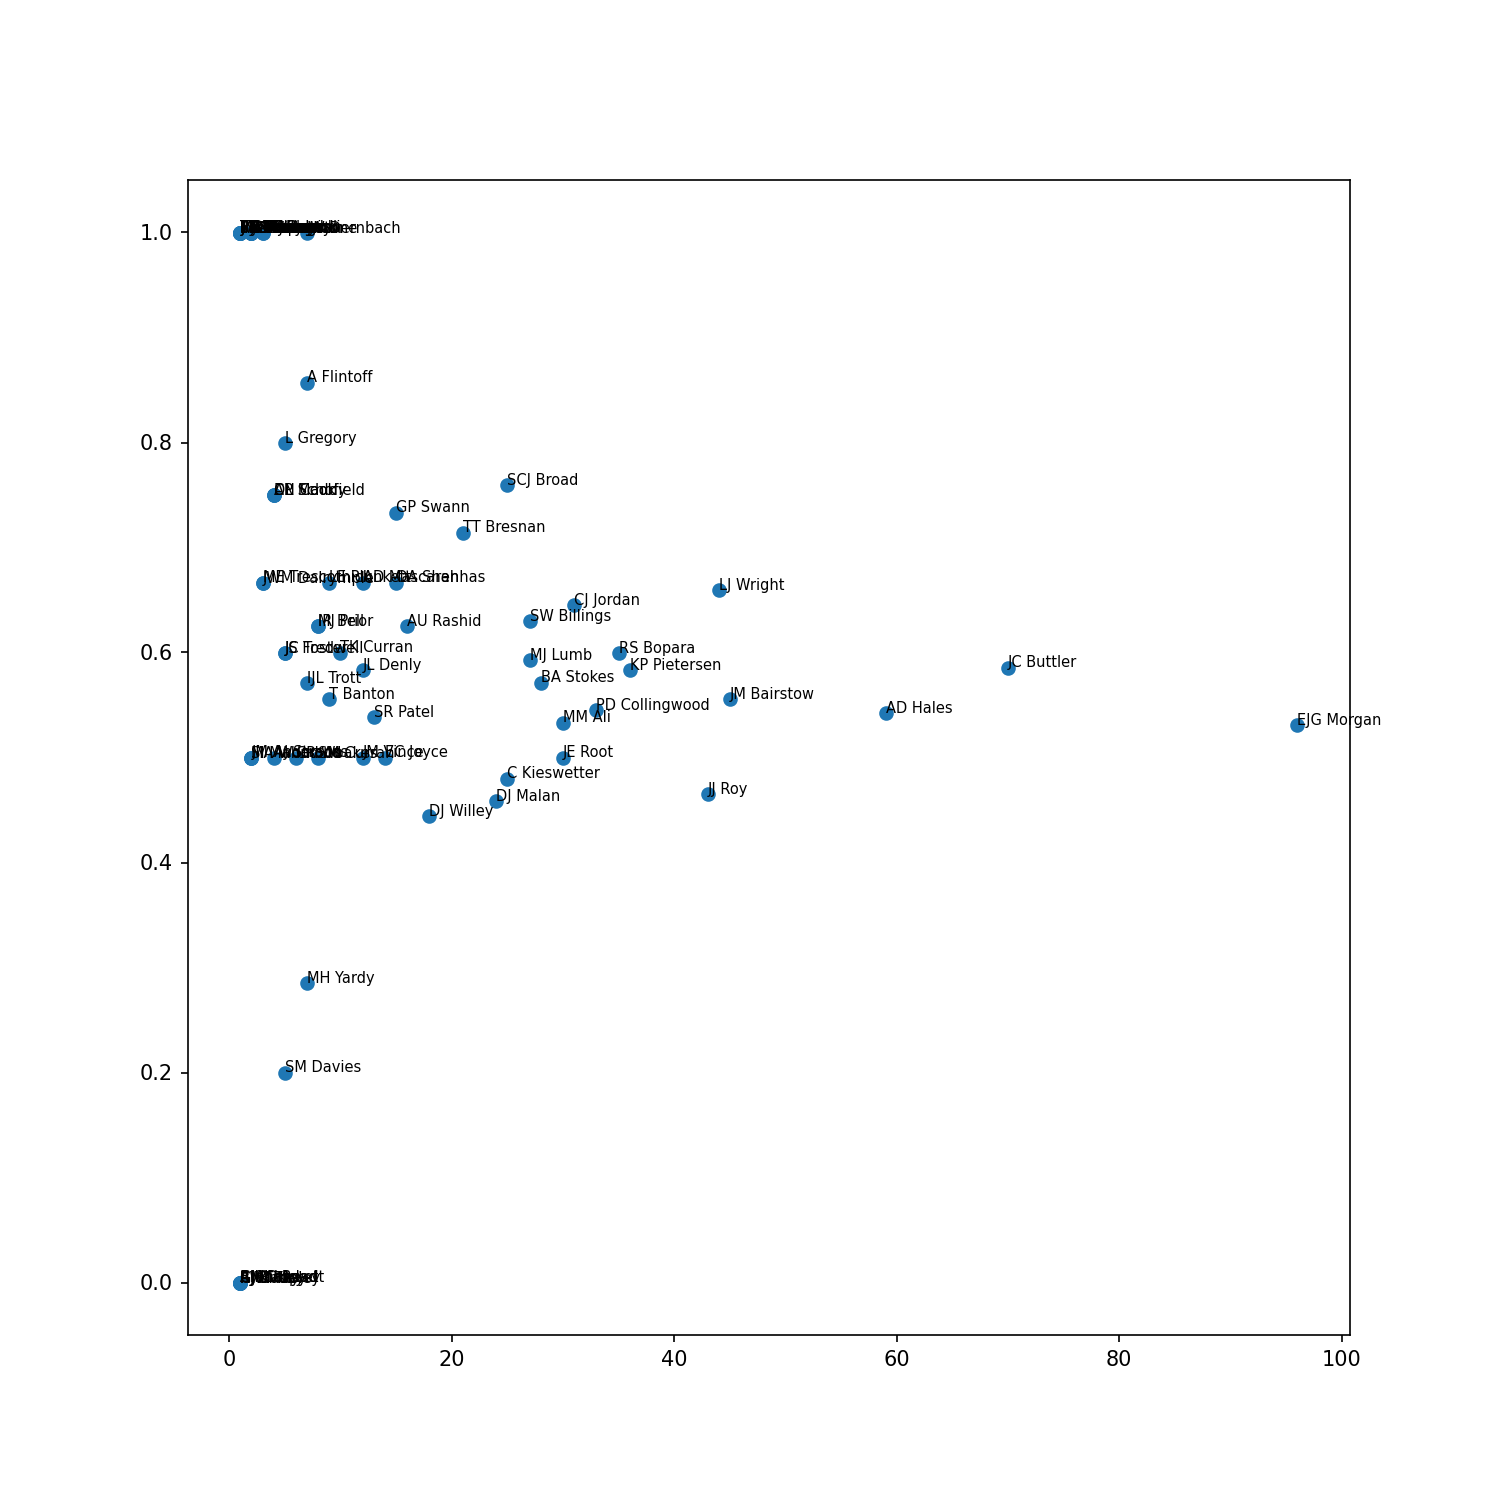

In [405]:
team="England"
n=relative_player_stats.win_rate[team_strikers].index
team_strikers=np.unique(game_data[game_data.batting_team==team].striker)
fig,ax=plt.subplots(figsize=(10,10))
plt.scatter(relative_player_stats.games_played[team_strikers],relative_player_stats.win_rate[team_strikers])
for i, txt in enumerate(n):
    ax.annotate(txt, (relative_player_stats.games_played[team_strikers][i], relative_player_stats.win_rate[team_strikers][i]),fontsize=7)
plt.show()

<IPython.core.display.Javascript object>


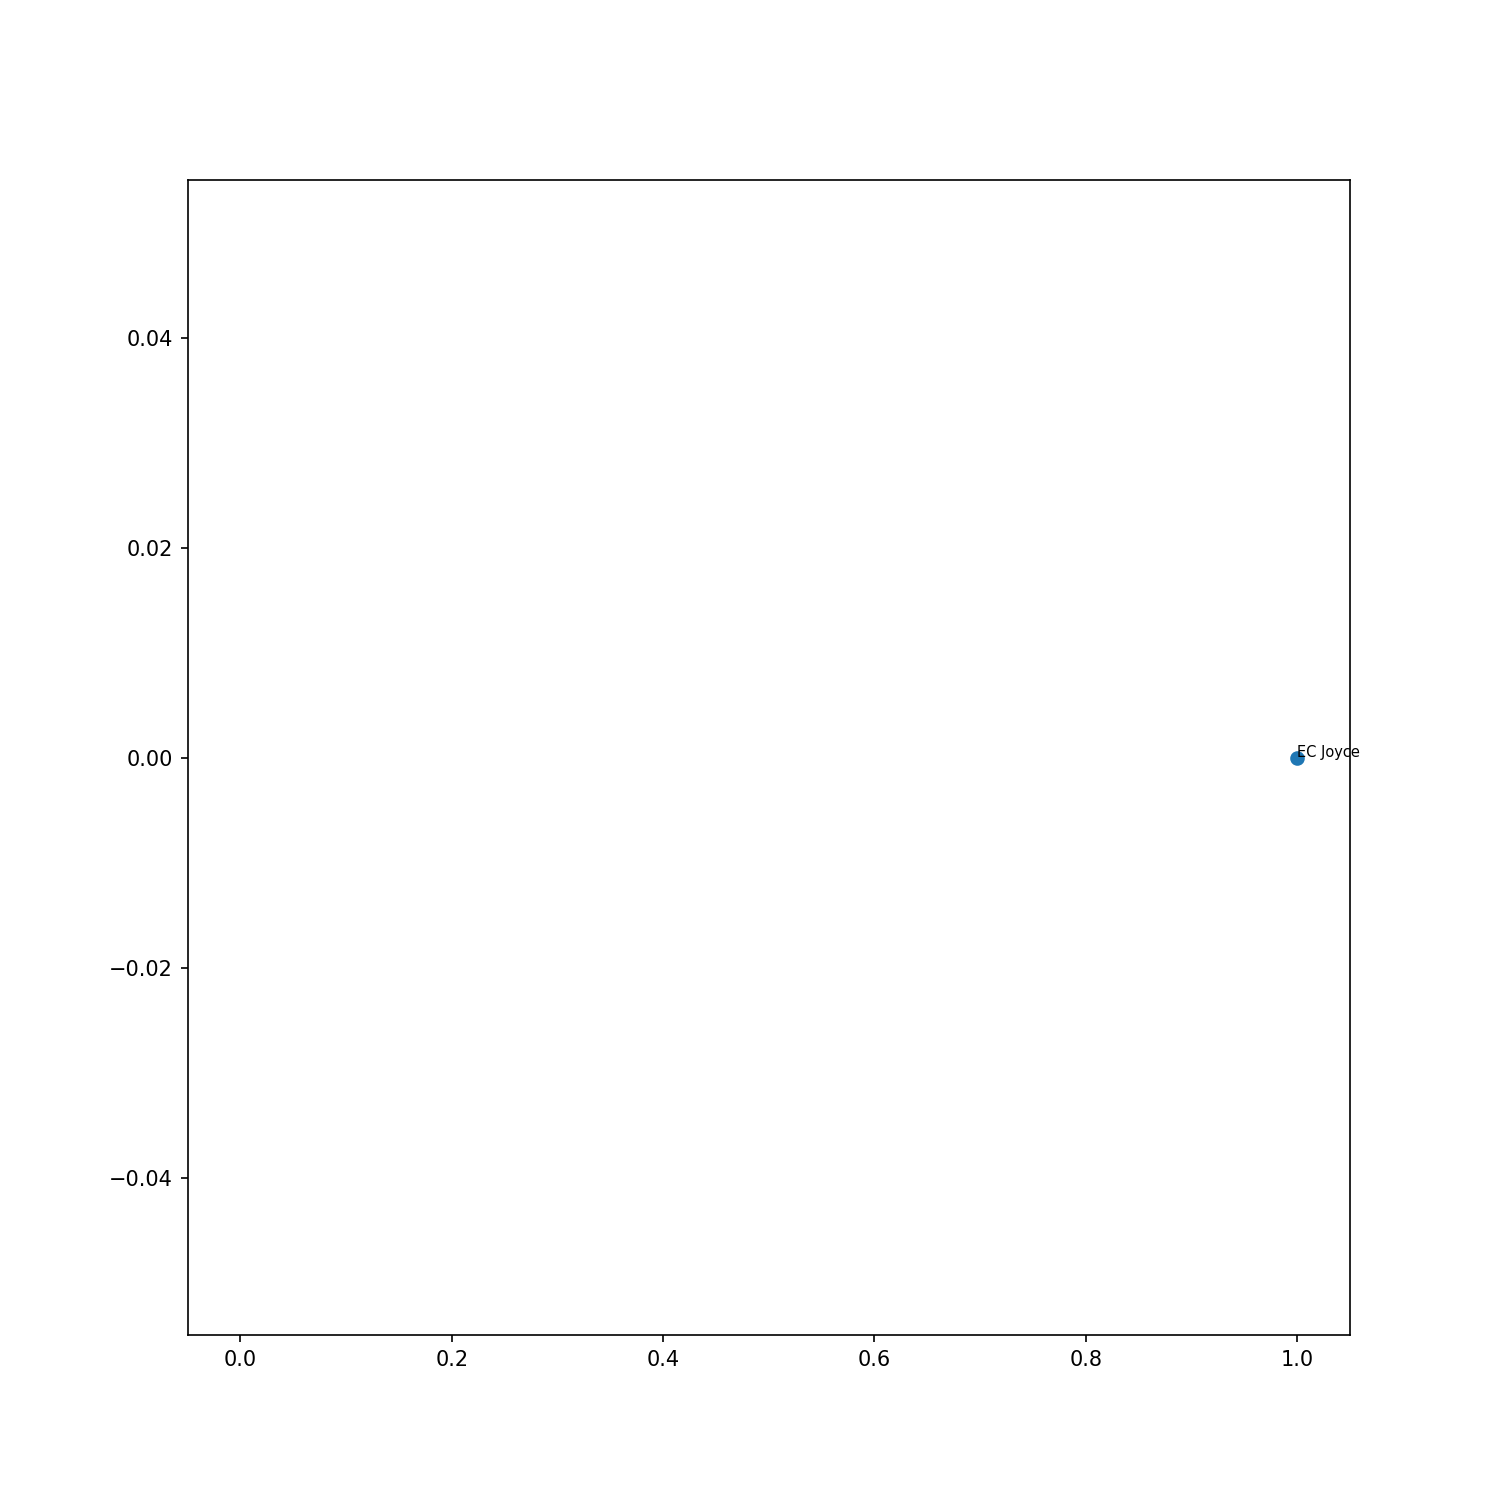

In [406]:
n=relative_player_stats.win_rate[team_strikers].index
team_strikers=np.unique(game_data[game_data.batting_team==team].striker)
fig,ax=plt.subplots(figsize=(10,10))
plt.scatter(relative_player_stats_cluster.games_played[team_strikers],relative_player_stats_cluster.win_rate[team_strikers])
for i, txt in enumerate(n):
    ax.annotate(txt, (relative_player_stats_cluster.games_played[team_strikers][i], relative_player_stats_cluster.win_rate[team_strikers][i]),fontsize=7)
plt.show()

<IPython.core.display.Javascript object>


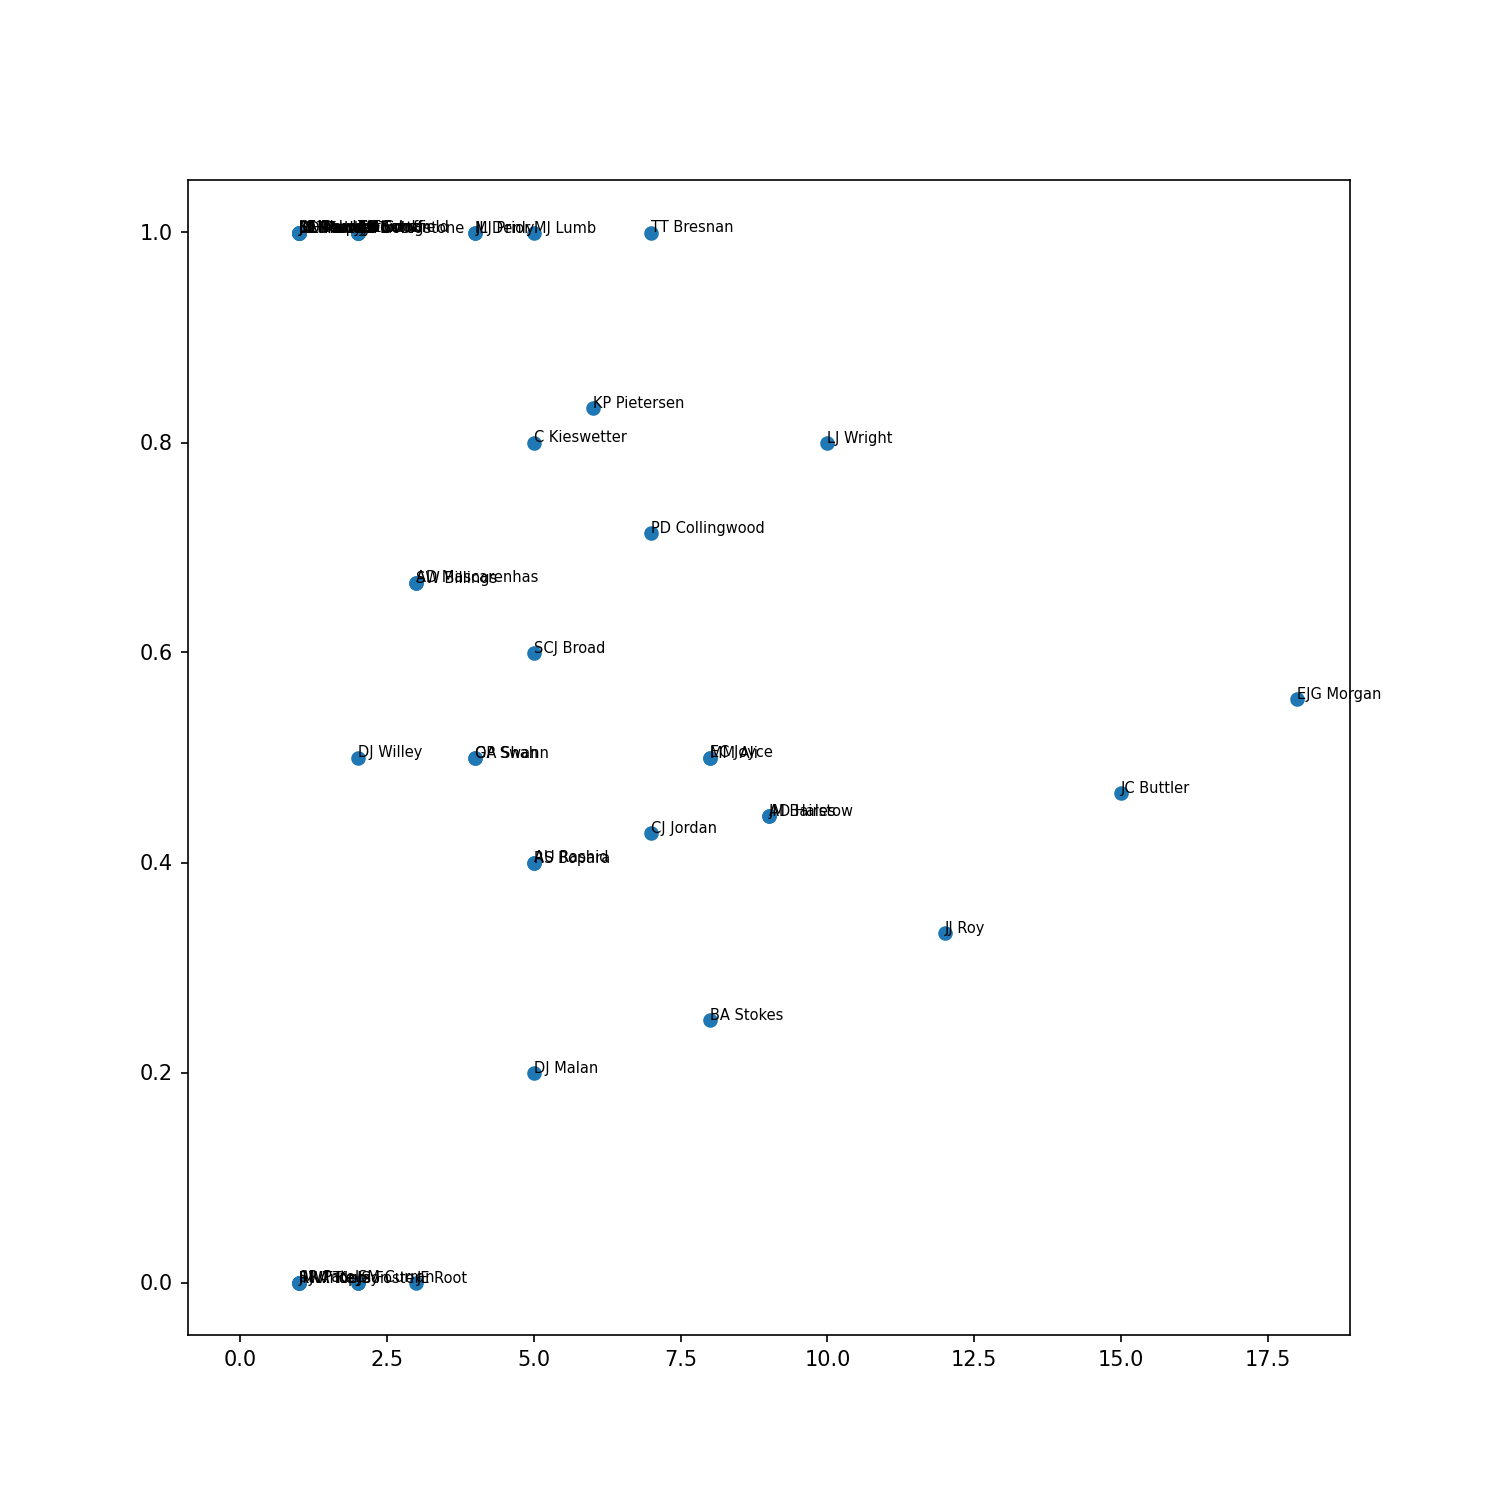

In [407]:
n=relative_player_stats.win_rate[team_strikers].index
team_strikers=np.unique(game_data[game_data.batting_team==team].striker)
fig,ax=plt.subplots(figsize=(10,10))
plt.scatter(relative_player_stats_cluster2.games_played[team_strikers],relative_player_stats_cluster2.win_rate[team_strikers])
for i, txt in enumerate(n):
    ax.annotate(txt, (relative_player_stats_cluster2.games_played[team_strikers][i], relative_player_stats_cluster2.win_rate[team_strikers][i]),fontsize=7)
plt.show()

<IPython.core.display.Javascript object>


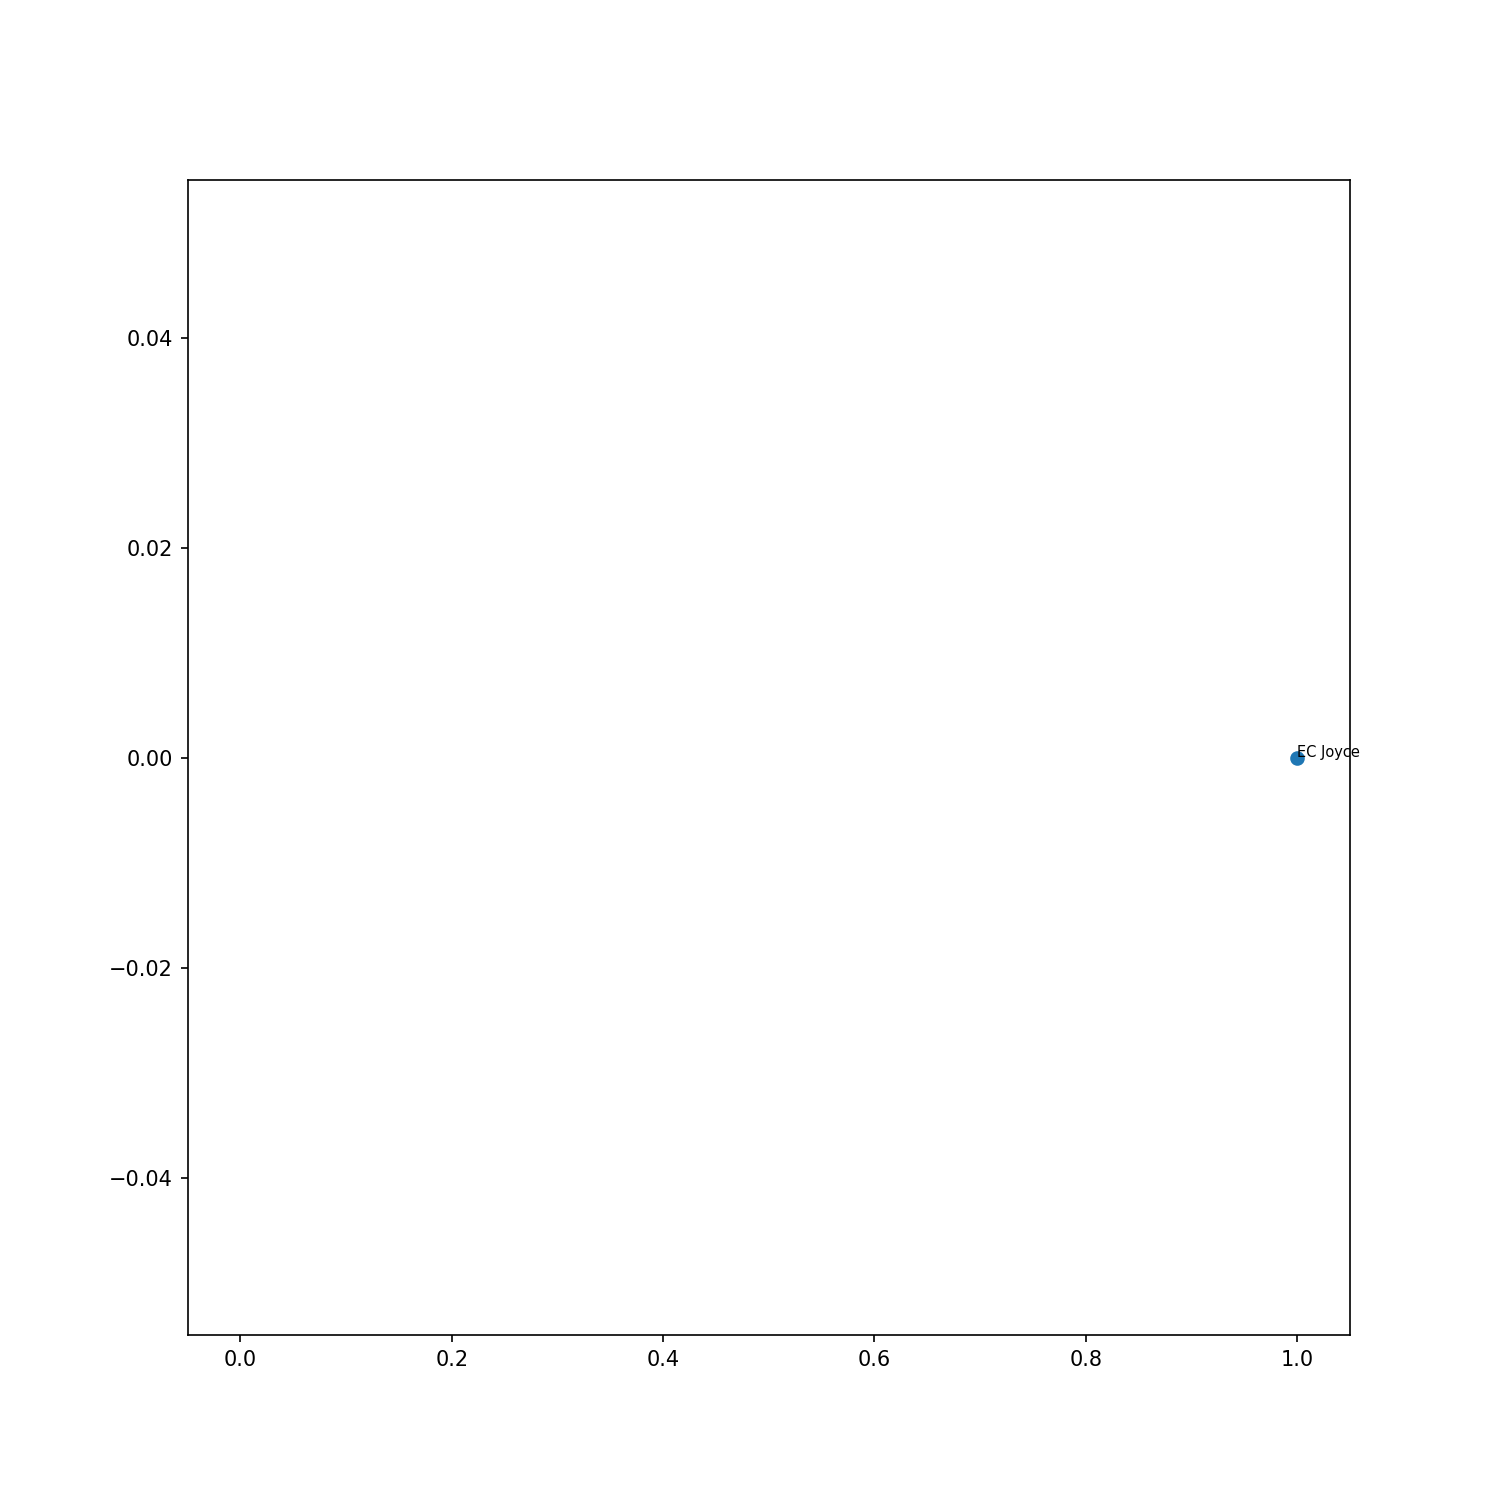

In [294]:
n=relative_player_stats.win_rate[team_strikers].index
team_strikers=np.unique(game_data[game_data.batting_team==team].striker)
fig,ax=plt.subplots(figsize=(10,10))
plt.scatter(relative_player_stats_cluster0.games_played[team_strikers],relative_player_stats_cluster0.win_rate[team_strikers])
for i, txt in enumerate(n):
    ax.annotate(txt, (relative_player_stats_cluster0.games_played[team_strikers][i], relative_player_stats_cluster0.win_rate[team_strikers][i]),fontsize=7)
plt.show()

Index(['MH Yardy', 'DJ Willey', 'DJ Malan', 'JJ Roy', 'C Kieswetter',
       'JM Vince', 'JE Root', 'SM Curran', 'EC Joyce', 'EJG Morgan', 'MM Ali',
       'SR Patel', 'AD Hales', 'PD Collingwood', 'T Banton', 'JM Bairstow',
       'IJL Trott', 'BA Stokes', 'KP Pietersen', 'JL Denly', 'JC Buttler',
       'MJ Lumb', 'RS Bopara', 'TK Curran', 'IR Bell', 'AU Rashid',
       'SW Billings', 'CJ Jordan', 'LJ Wright', 'OA Shah', 'AD Mascarenhas',
       'TT Bresnan', 'GP Swann', 'SCJ Broad'],
      dtype='object')


<IPython.core.display.Javascript object>


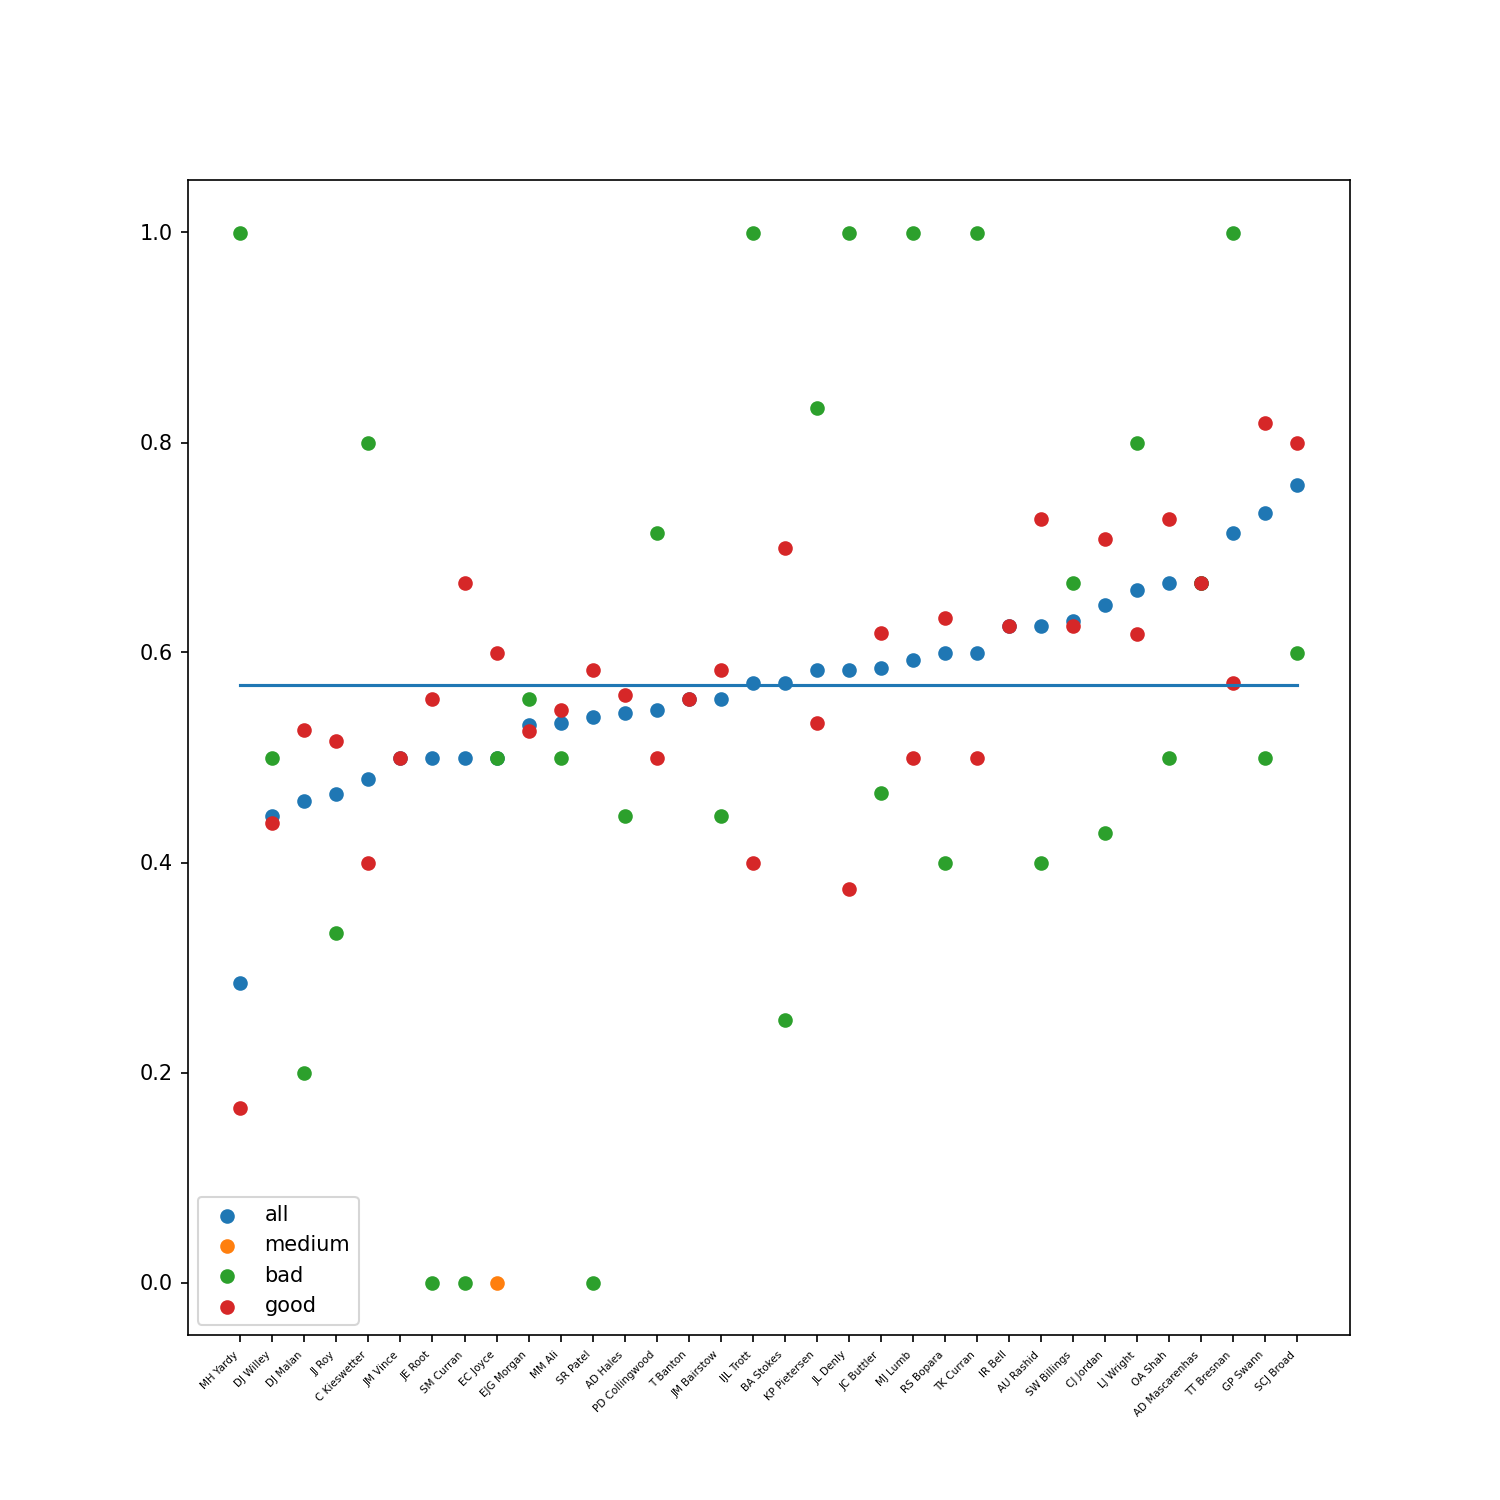

In [499]:
indecies=games_played_sheet[team_strikers].sum()>5
ts=team_strikers[indecies]
indecies=relative_player_stats.win_rate[ts].sort_values().index
print(indecies)
fig,ax=plt.subplots(figsize=(10,10))
plt.scatter(indecies,relative_player_stats.win_rate[indecies])
plt.scatter(indecies,relative_player_stats_cluster.win_rate[indecies])
plt.scatter(indecies,relative_player_stats_cluster2.win_rate[indecies])
plt.scatter(indecies,relative_player_stats_cluster0.win_rate[indecies])
plt.legend(["all","medium","bad","good"])
plt.plot([np.mean(relative_player_stats.win_rate[indecies]) for i in range(len(ts))])
plt.xticks(rotation=45, ha='right',fontsize=5)
plt.show()

Index(['TK Curran', 'MH Yardy', 'JM Vince', 'JJ Roy', 'SM Curran', 'DJ Malan',
       'BA Stokes', 'DJ Willey', 'AU Rashid', 'SR Patel', 'MM Ali',
       'JC Buttler', 'JE Root', 'AD Mascarenhas', 'AD Hales', 'EJG Morgan',
       'CJ Jordan', 'IR Bell', 'OA Shah', 'RS Bopara', 'JM Bairstow',
       'EC Joyce', 'SW Billings', 'MJ Lumb', 'KP Pietersen', 'T Banton',
       'PD Collingwood', 'C Kieswetter', 'SCJ Broad', 'LJ Wright', 'GP Swann',
       'TT Bresnan', 'JL Denly', 'IJL Trott'],
      dtype='object')


<IPython.core.display.Javascript object>


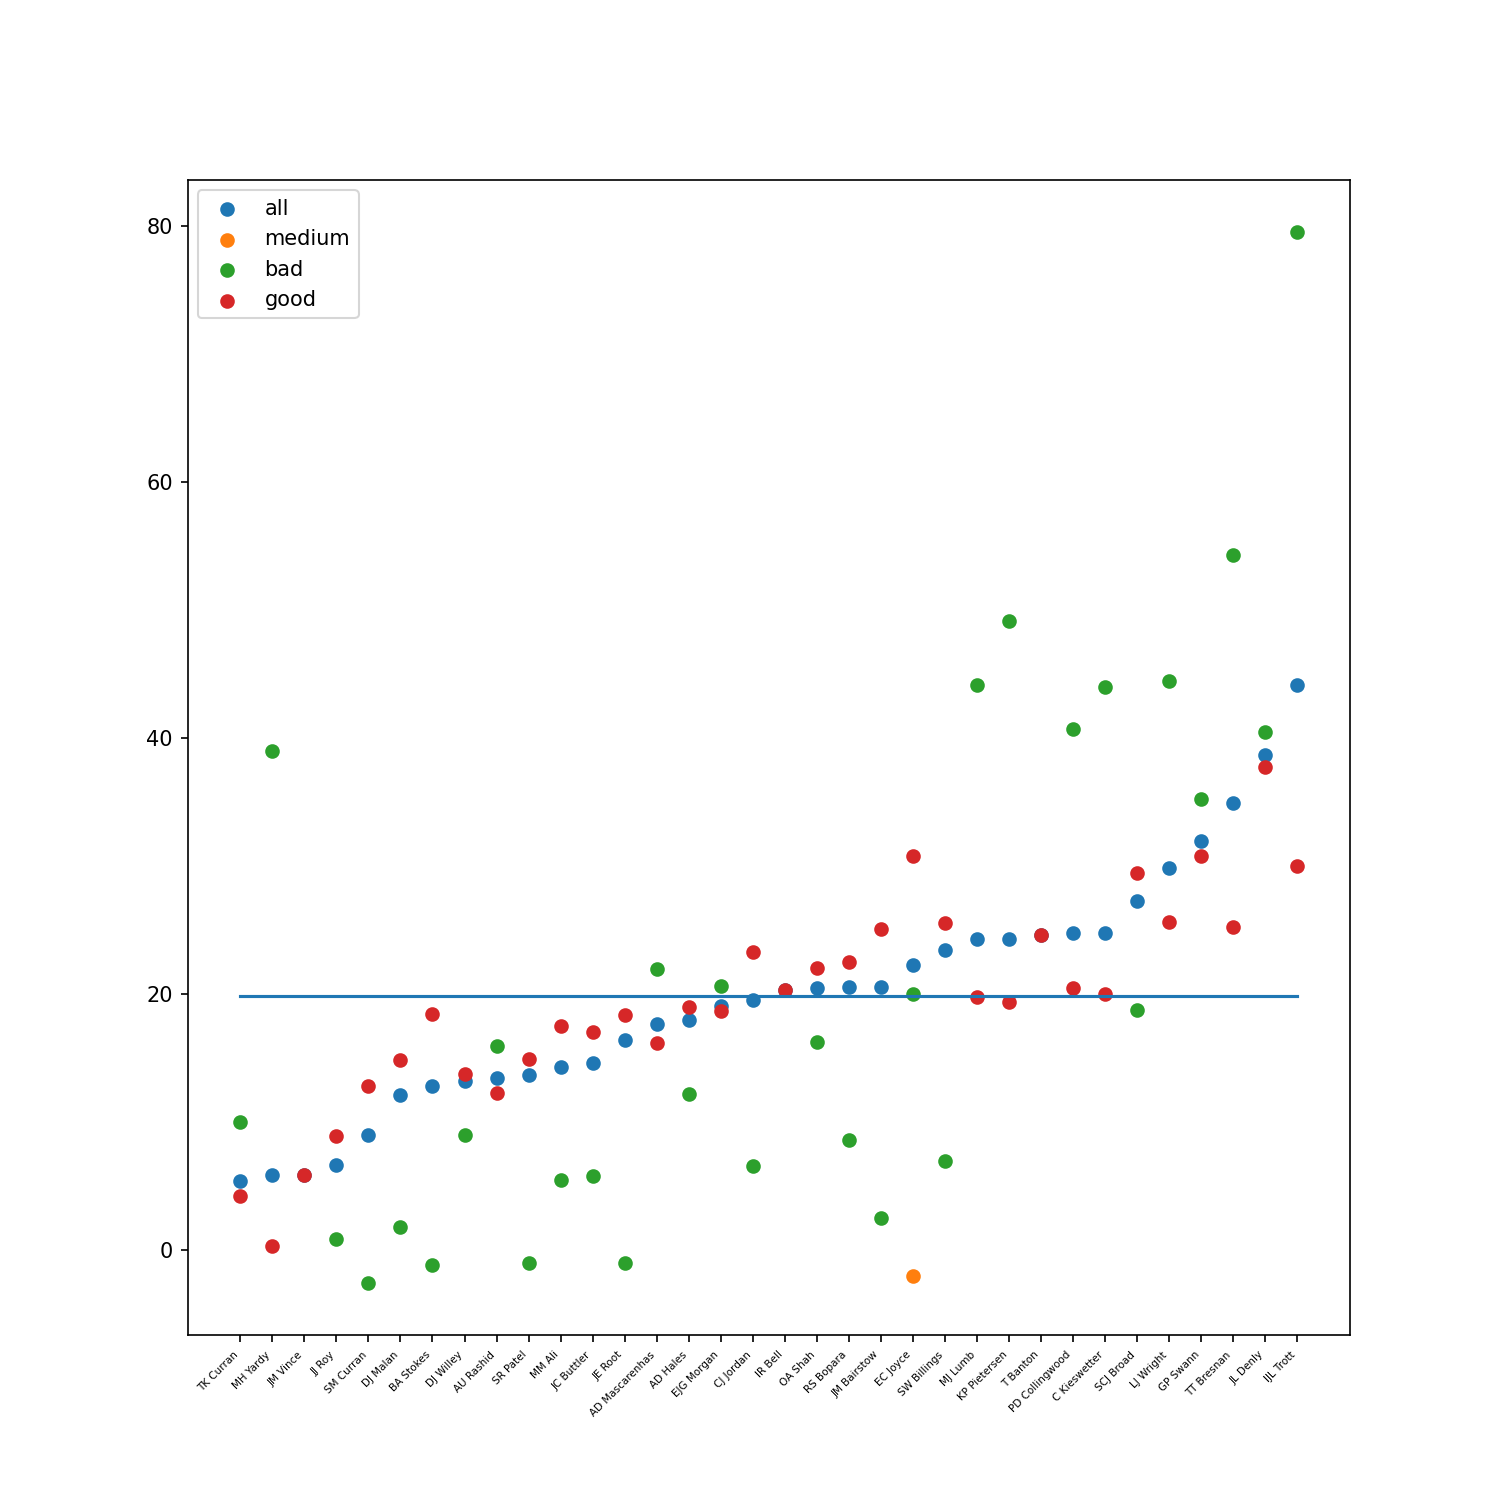

In [498]:
indecies=games_played_sheet[team_strikers].sum()>5
ts=team_strikers[indecies]
indecies=relative_player_stats.run_difference[ts].sort_values().index
print(indecies)
fig,ax=plt.subplots(figsize=(10,10))
plt.scatter(indecies,relative_player_stats.run_difference[indecies])
plt.scatter(indecies,relative_player_stats_cluster.run_difference[indecies])
plt.scatter(indecies,relative_player_stats_cluster2.run_difference[indecies])
plt.scatter(indecies,relative_player_stats_cluster0.run_difference[indecies])
plt.legend(["all","medium","bad","good"])
plt.plot([np.mean(relative_player_stats.run_difference[ts].sort_values()) for i in range(len(ts))])
plt.xticks(rotation=45, ha='right',fontsize=5)
plt.show()

In [446]:
relative_strike_rate=pd.DataFrame(columns=balls_sheet.columns[1:],index=["0","1","2","all"])
player_matches=game_data.groupby("striker")["match_id"].apply(lambda x: list(np.unique(x)))
for p in balls_sheet.columns[1:]:
    try:
        pm=player_matches[p]
    except:
        pm=[]
    for i in range(len(relative_strike_rate)):
        temp=[]
        for m in pm:
            try:
                if match_data[match_data.match_id==m].team_1.values[0]==team:
                    c=team_stats.cluster[match_data[match_data.match_id==m].team_2.values[0]]
                else:
                    c=team_stats.cluster[match_data[match_data.match_id==m].team_1.values[0]]
            except:
                c=0
            if i==3:
                temp=pm
                break
            elif c==i:
                temp.append(m)
        #print(temp)
        try:
            selection=game_data[game_data.match_id.isin(temp)]
            selection=selection[selection.striker==p]
            #print(selection)
            relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
        except:
            relative_strike_rate[p].iloc[i]=0
relative_strike_rate

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scalars
  relative_strike_rate[p].iloc[i]=selection.runs_off_bat.sum()/len(selection)*100
<ipython-input-446-ec0c63e6d65e>:28: RuntimeWarning: invalid value encountered in longlong_scal

,A Ahmadhel,A Ashokan,A Bagai,A Balbirnie,A Bhagwat,A Bhattarai,A Bohara,A Bulow,A Dananjaya,A Dutt,...,Zeeshan Maqsood,Zeeshan Siddiqui,Ziaur Rahman,Ziaur Rahman (2),Zishan Shah,Zohaib Sarwar,Zubaidi Zulkifle,Zulfiqar Babar,Zulqarnain Haider,Zulqarnain Haider (2)
0,NaN,94.117647,NaN,118.269231,NaN,NaN,NaN,NaN,95.833333,NaN,...,133.333333,NaN,133.333333,NaN,NaN,0.0,NaN,96.428571,81.818182,NaN
1,25.0,103.409091,97.029703,118.26087,16.666667,NaN,133.333333,84.615385,NaN,NaN,...,104.692082,95.081967,NaN,NaN,101.149425,150.0,100.0,NaN,NaN,NaN
2,NaN,NaN,119.642857,131.360947,33.333333,66.666667,45.454545,NaN,57.142857,0.0,...,105.102041,NaN,25.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN
all,25.0,101.904762,105.095541,127.410468,22.222222,66.666667,85.0,84.615385,84.057971,0.0,...,105.908096,95.081967,122.077922,NaN,101.149425,126.923077,100.0,96.428571,81.818182,NaN


<IPython.core.display.Javascript object>


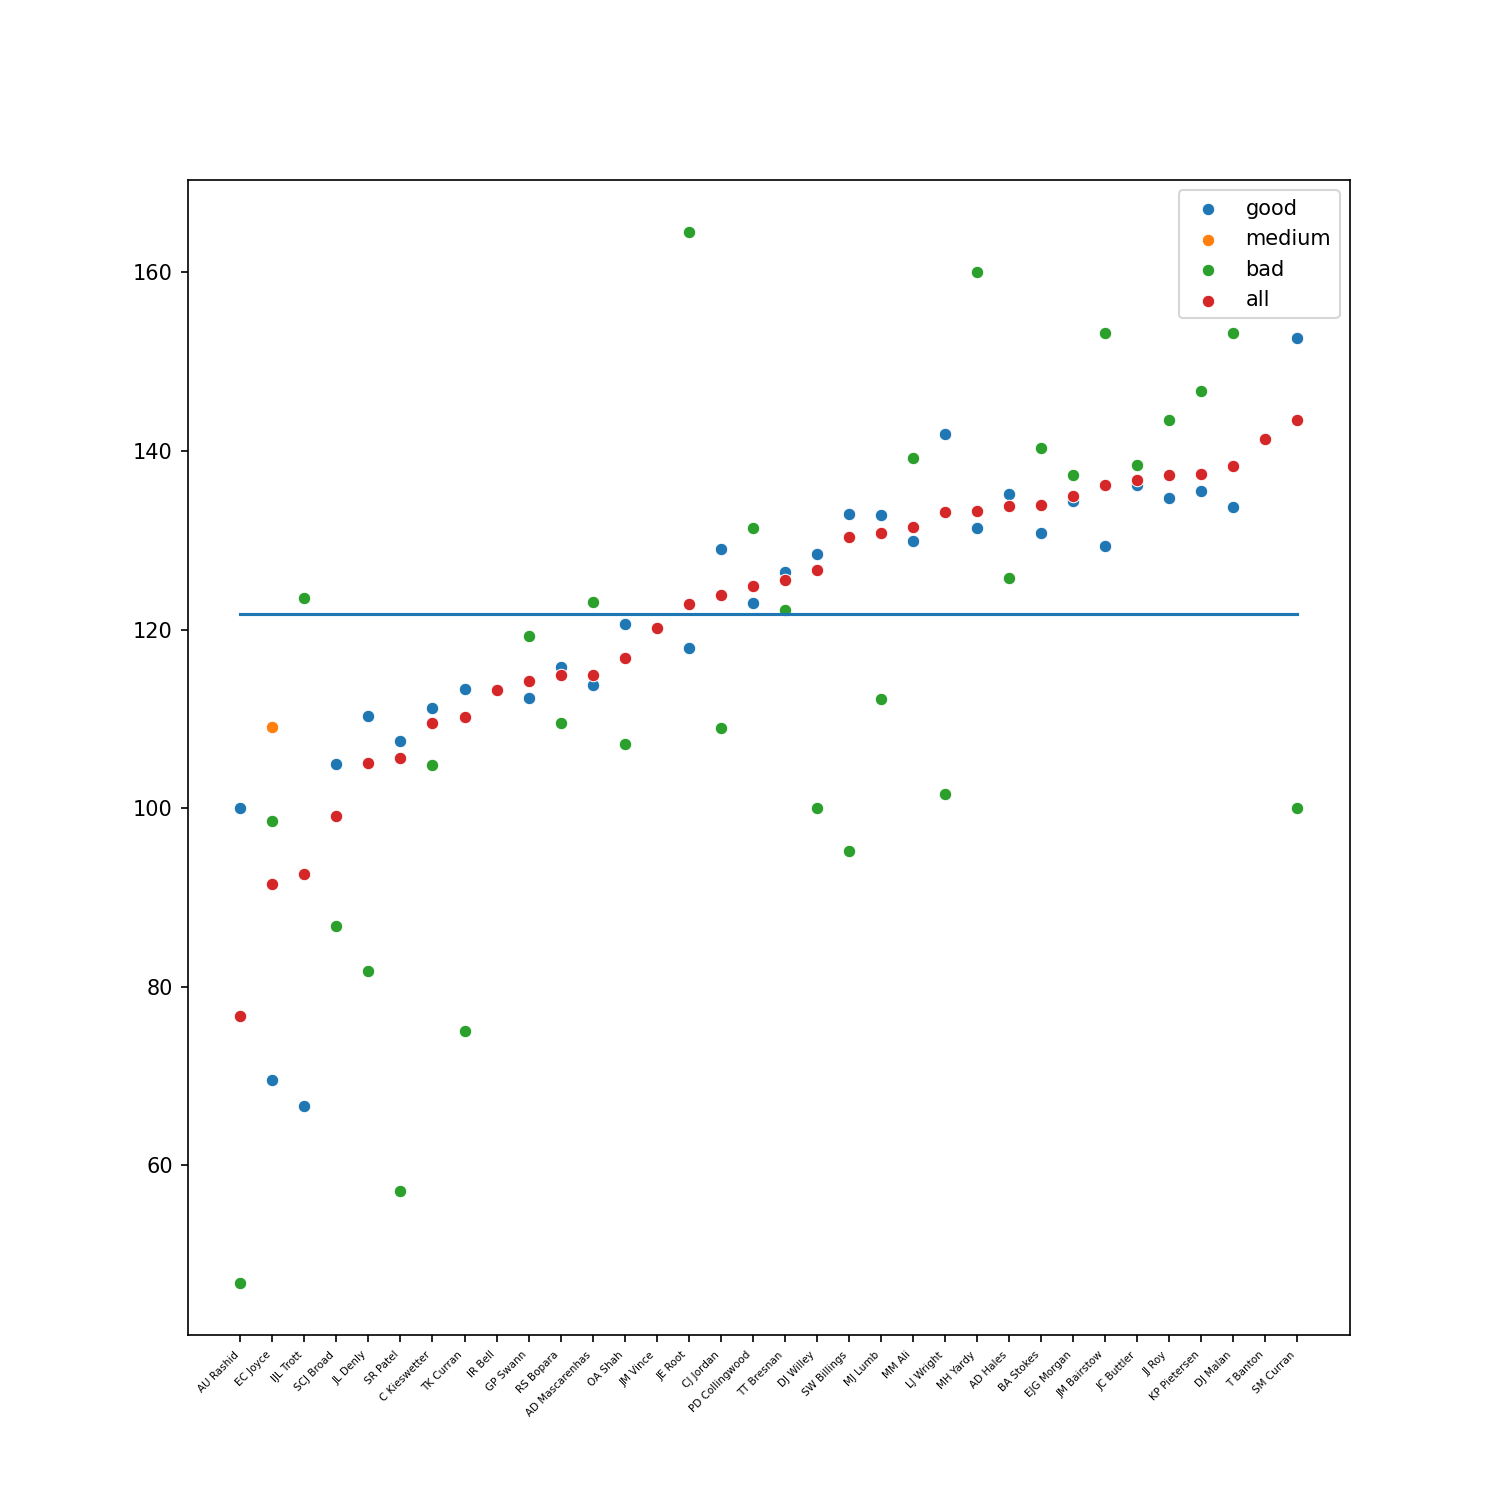

c:\users\evolj\documents\github\cric_bet\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\evolj\documents\github\cric_bet\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\evolj\documents\github\cric_bet\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

In [500]:
team="England"
n=relative_player_stats.win_rate[team_strikers].index
team_strikers=np.unique(game_data[game_data.batting_team==team].striker)#relative_strike_rate.columns#
indecies=team_strikers[balls_sheet[team_strikers].sum()>500]
indecies=team_strikers[games_played_sheet[team_strikers].sum()>5]
indecies=relative_strike_rate[indecies].iloc[3].sort_values().index
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(indecies,relative_strike_rate[indecies].values[0])
sns.scatterplot(indecies,relative_strike_rate[indecies].values[1])
sns.scatterplot(indecies,relative_strike_rate[indecies].values[2])
sns.scatterplot(indecies,relative_strike_rate[indecies].values[3])
plt.legend(["good","medium","bad","all"])
plt.plot([np.mean(relative_strike_rate[indecies].iloc[3]) for i in range(len(indecies))])
plt.xticks(rotation=45, ha='right',fontsize=5)
plt.show()

In [503]:
for i in range(4):
    print(np.nanmean(relative_strike_rate[indecies].values[i]))

121.69094753532887
109.09090909090908
116.36569053752818
121.80157933241055
